# Modelo de Propension de Compra

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importamos librería

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
import lightgbm as lgbm
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

import xgboost as xgb # gradient boosting decision tree

from sklearn.ensemble import RandomForestClassifier

from sklearn import model_selection

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix

from sklearn.tree import export_graphviz
import graphviz

import pickle








### Data Preparation

In [ ]:
df_cust_demo =pd.read_csv('/content/drive/MyDrive/TFM/Datasets_merge/df_cust_demo.csv')

In [ ]:
df_cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5929961 entries, 0 to 5929960
Data columns (total 25 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   pk_partition        object 
 2   entry_date          object 
 3   entry_channel       int64  
 4   active_customer     int64  
 5   segment             int64  
 6   short_term_deposit  int64  
 7   loans               int64  
 8   mortgage            int64  
 9   funds               int64  
 10  securities          int64  
 11  long_term_deposit   int64  
 12  credit_card         int64  
 13  payroll             int64  
 14  pension_plan        int64  
 15  payroll_account     int64  
 16  emc_account         int64  
 17  debit_card          int64  
 18  em_account_p        int64  
 19  em_acount           int64  
 20  country_id          int64  
 21  region_code         int64  
 22  gender              int64  
 23  age                 int64  
 24  salary              floa

In [ ]:
# nos facilita la visualizacion del dataframe completo
pd.set_option('display.max_columns', None)

In [ ]:
df_cust_demo.shape

(5929961, 25)

In [ ]:
df_cust_demo['pk_partition']

0          2018-01
1          2018-01
2          2018-01
3          2018-01
4          2018-01
            ...   
5929956    2019-05
5929957    2019-05
5929958    2019-05
5929959    2019-05
5929960    2019-05
Name: pk_partition, Length: 5929961, dtype: object

In [ ]:
df_cust_demo['entry_date']

0          2018-01
1          2015-08
2          2015-08
3          2015-08
4          2015-08
            ...   
5929956    2016-08
5929957    2016-08
5929958    2016-08
5929959    2016-08
5929960    2019-05
Name: entry_date, Length: 5929961, dtype: object

In [ ]:
# Hacemos un cast to_datetime de la variable 'month_sale'
df_cust_demo['entry_date'] = pd.to_datetime(df_cust_demo['entry_date'])
df_cust_demo['pk_partition'] = pd.to_datetime(df_cust_demo['pk_partition'])

In [ ]:
df_cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5929961 entries, 0 to 5929960
Data columns (total 25 columns):
 #   Column              Dtype         
---  ------              -----         
 0   pk_cid              int64         
 1   pk_partition        datetime64[ns]
 2   entry_date          datetime64[ns]
 3   entry_channel       int64         
 4   active_customer     int64         
 5   segment             int64         
 6   short_term_deposit  int64         
 7   loans               int64         
 8   mortgage            int64         
 9   funds               int64         
 10  securities          int64         
 11  long_term_deposit   int64         
 12  credit_card         int64         
 13  payroll             int64         
 14  pension_plan        int64         
 15  payroll_account     int64         
 16  emc_account         int64         
 17  debit_card          int64         
 18  em_account_p        int64         
 19  em_acount           int64         
 20  co

In [ ]:
df_cust_demo.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,salary
0,1375586,2018-01-01,2018-01-01,60,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,29,1,35,87218.10
1,1050611,2018-01-01,2015-08-01,57,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,13,0,23,35548.74
2,1050612,2018-01-01,2015-08-01,57,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,13,0,23,122179.11
3,1050613,2018-01-01,2015-08-01,56,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,50,1,22,119775.54
4,1050614,2018-01-01,2015-08-01,57,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,50,0,23,100737.51


In [ ]:
#Extraemos para situarnos los valores de pk_partition
df_cust_demo['pk_partition'].value_counts()

2019-05-01    440572
2019-04-01    437235
2019-03-01    433840
2019-02-01    429424
2019-01-01    424638
2018-12-01    420302
2018-11-01    414308
2018-10-01    400271
2018-09-01    373328
2018-08-01    350981
2018-07-01    337428
2018-06-01    250488
2018-05-01    248333
2018-04-01    245922
2018-03-01    243763
2018-02-01    241063
2018-01-01    238065
Name: pk_partition, dtype: int64

In [ ]:
df_cust_demo['pk_partition'].nunique()

17

### Funciones / procedimientos

In [ ]:
#transform_datetime_column,
#Parametros de entrada

#df --> dataframe
#column_name --> variable dataset (indica fecha)
#Objetivo: convertir en to_datetime la columna que le pasamos como parametro, dividiendo en year, month, dos columnas adicionales
#Nota: en este dataset al tener todas las fechas dia 1 no creara columna adicional 'day_'


In [ ]:
def transform_datetime_column(df, column_name):
    # Convertir la columna al formato datetime
    df[column_name] = pd.to_datetime(df[column_name])
    # Crear nuevas columnas de 'año' y 'mes'
    df[f'{column_name}_year'] = df[column_name].dt.year
    df[f'{column_name}_month'] = df[column_name].dt.month
    # Comprobar si el dataset original contiene información sobre el día
    if df[column_name].dt.day.nunique() > 1:
        df[f'{column_name}_day'] = df[column_name].dt.day
    # Eliminar la columna datetime original
    df.drop(column_name, axis=1, inplace=True)
    return df

In [ ]:

# Aplicamos la funcion para 'pk_partition' en df_activity_desc_ML
#df_cust_demo1 = transform_datetime_column(df_cust_demo,'pk_partition')

#df_cust_demo1 = transform_datetime_column(df_cust_demo,'entry_date')

In [ ]:
##Funcion CreacionVariablesProductos ,los parametros de entrada serian un df y una lista
#Inicializa columnas y en base a una lista_productos hace el sumatorio
# def CreacionVariablesProductos(df,lista_productos)
def CreacionVariablesProductos(df,lista_productos):
  for new_col in set(lista_productos.values()):
      df[new_col] = 0

# Summing the values in the new columns based on the 'tipo_productos' mapping
  for orig_col, new_col in lista_productos.items():
      df[new_col] += df[orig_col]

  return df

In [ ]:
df_cust_demo1 = df_cust_demo.copy()

In [ ]:
df_cust_demo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5929961 entries, 0 to 5929960
Data columns (total 25 columns):
 #   Column              Dtype         
---  ------              -----         
 0   pk_cid              int64         
 1   pk_partition        datetime64[ns]
 2   entry_date          datetime64[ns]
 3   entry_channel       int64         
 4   active_customer     int64         
 5   segment             int64         
 6   short_term_deposit  int64         
 7   loans               int64         
 8   mortgage            int64         
 9   funds               int64         
 10  securities          int64         
 11  long_term_deposit   int64         
 12  credit_card         int64         
 13  payroll             int64         
 14  pension_plan        int64         
 15  payroll_account     int64         
 16  emc_account         int64         
 17  debit_card          int64         
 18  em_account_p        int64         
 19  em_acount           int64         
 20  co

In [ ]:
df_cust_demo1.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,salary
0,1375586,2018-01-01,2018-01-01,60,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,29,1,35,87218.10
1,1050611,2018-01-01,2015-08-01,57,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,13,0,23,35548.74
2,1050612,2018-01-01,2015-08-01,57,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,13,0,23,122179.11
3,1050613,2018-01-01,2015-08-01,56,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,50,1,22,119775.54
4,1050614,2018-01-01,2015-08-01,57,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,50,0,23,100737.51


In [ ]:
df_cust_demo1['payroll'].value_counts()

0    5724195
1     205766
Name: payroll, dtype: int64

In [ ]:
df_cust_demo1['payroll_account'].value_counts()

0    5600684
1     329277
Name: payroll_account, dtype: int64

### Definicion de Variables 'listado_productos' / 'tipo_productos'

In [ ]:
listado_productos = [col for col in df_cust_demo1.columns if col not in ['pk_cid', 'entry_channel', 'active_customer', 'segment','region_code',
 'gender',
 'age',
 'salary',
 'pk_partition',
 'entry_date'
,'country_id']]

In [ ]:
listado_productos

['short_term_deposit',
 'loans',
 'mortgage',
 'funds',
 'securities',
 'long_term_deposit',
 'credit_card',
 'payroll',
 'pension_plan',
 'payroll_account',
 'emc_account',
 'debit_card',
 'em_account_p',
 'em_acount']

In [ ]:
tipo_productos = {"short_term_deposit": "activos_financieros" ,"loans": "creditos_prestamos" , "mortgage":"creditos_prestamos" ,"funds":"activos_financieros" ,
                  "securities":"activos_financieros" ,"long_term_deposit": "activos_financieros","credit_card":"creditos_prestamos"  ,'payroll':"cuenta_operaciones",'payroll_account':"cuenta_operaciones" ,"pension_plan":"activos_financieros",
                  "emc_account":"cuenta_operaciones" ,"debit_card":"creditos_prestamos" ,"em_account_p":"cuenta_operaciones" ,"em_acount":"cuenta_operaciones"}

In [ ]:
tipo_productos

{'short_term_deposit': 'activos_financieros',
 'loans': 'creditos_prestamos',
 'mortgage': 'creditos_prestamos',
 'funds': 'activos_financieros',
 'securities': 'activos_financieros',
 'long_term_deposit': 'activos_financieros',
 'credit_card': 'creditos_prestamos',
 'payroll': 'cuenta_operaciones',
 'payroll_account': 'cuenta_operaciones',
 'pension_plan': 'activos_financieros',
 'emc_account': 'cuenta_operaciones',
 'debit_card': 'creditos_prestamos',
 'em_account_p': 'cuenta_operaciones',
 'em_acount': 'cuenta_operaciones'}

In [ ]:
df_cust_demo1.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,salary
0,1375586,2018-01-01,2018-01-01,60,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,29,1,35,87218.10
1,1050611,2018-01-01,2015-08-01,57,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,13,0,23,35548.74
2,1050612,2018-01-01,2015-08-01,57,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,13,0,23,122179.11
3,1050613,2018-01-01,2015-08-01,56,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,50,1,22,119775.54
4,1050614,2018-01-01,2015-08-01,57,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,50,0,23,100737.51


In [ ]:
#Analisis del atributo 'entry_date'. y el valor unique
grouped_by_cid = df_cust_demo1.groupby('pk_cid')['entry_date'].agg(list).reset_index()

In [ ]:
grouped_by_cid.head(100)

,pk_cid,entry_date
0,15891,"[2018-07-01 00:00:00, 2018-07-01 00:00:00]"
1,16063,"[2018-11-01 00:00:00, 2018-11-01 00:00:00, 201..."
2,16203,"[2018-12-01 00:00:00, 2018-12-01 00:00:00, 201..."
3,16502,"[2018-09-01 00:00:00, 2018-09-01 00:00:00, 201..."
4,17457,"[2017-09-01 00:00:00, 2017-09-01 00:00:00, 201..."
...,...,...
95,40698,"[2017-06-01 00:00:00, 2017-06-01 00:00:00, 201..."
96,40896,"[2015-07-01 00:00:00, 2015-07-01 00:00:00, 201..."
97,41264,"[2019-03-01 00:00:00, 2019-03-01 00:00:00, 201..."
98,41467,"[2018-08-01 00:00:00, 2018-08-01 00:00:00, 201..."


In [ ]:
#Agrupacion por pk_cid con el objetivo de visualizar entry_date por pk_cid
unique_entry_dates = df_cust_demo1.groupby('pk_cid')['entry_date'].nunique().reset_index()
unique_entry_dates.columns = ['pk_cid', 'num_unique_entry_dates']
unique_entry_dates

,pk_cid,num_unique_entry_dates
0,15891,1
1,16063,1
2,16203,1
3,16502,1
4,17457,1
...,...,...
453939,1553685,1
453940,1553686,1
453941,1553687,1
453942,1553688,1


In [ ]:
# Ordenar el DataFrame por 'pk_cid' y 'pk_partition'
df_cust_demo1.sort_values(['pk_cid', 'pk_partition'], inplace=True)





In [ ]:
# Inicializar nuevas columnas para indicadores de compra
for product in listado_productos:
    df_cust_demo1[f'purchased_{product}'] = 0


In [ ]:
df_cust_demo1.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,salary,purchased_short_term_deposit,purchased_loans,purchased_mortgage,purchased_funds,purchased_securities,purchased_long_term_deposit,purchased_credit_card,purchased_payroll,purchased_pension_plan,purchased_payroll_account,purchased_emc_account,purchased_debit_card,purchased_em_account_p,purchased_em_acount
1470425,15891,2018-07-01,2018-07-01,17,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,28,1,59,138422.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2155142,15891,2018-08-01,2018-07-01,17,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,59,138422.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2945940,16063,2018-11-01,2018-11-01,17,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3607695,16063,2018-12-01,2018-11-01,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4005944,16063,2019-01-01,2018-11-01,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
listado_productos

['short_term_deposit',
 'loans',
 'mortgage',
 'funds',
 'securities',
 'long_term_deposit',
 'credit_card',
 'payroll',
 'pension_plan',
 'payroll_account',
 'emc_account',
 'debit_card',
 'em_account_p',
 'em_acount']

### Tratamiento del Dataset y Analisis Estadistico

#### Calculo del numero total por productos por pk_cid y pk_partition

In [ ]:
# Lista de columnas de productos que quieres sumar
listado_productos = ['short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
                     'long_term_deposit', 'credit_card', 'payroll', 'pension_plan',
                     'payroll_account', 'emc_account', 'debit_card', 'em_account_p',
                     'em_acount']
# Calcular el total de productos sumando las columnas de productos
df_cust_demo1['total_products'] = df_cust_demo1[listado_productos].sum(axis=1)
# Mostrar las primeras filas del DataFrame modificado
df_cust_demo1.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,salary,purchased_short_term_deposit,purchased_loans,purchased_mortgage,purchased_funds,purchased_securities,purchased_long_term_deposit,purchased_credit_card,purchased_payroll,purchased_pension_plan,purchased_payroll_account,purchased_emc_account,purchased_debit_card,purchased_em_account_p,purchased_em_acount,total_products
1470425,15891,2018-07-01,2018-07-01,17,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,28,1,59,138422.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2155142,15891,2018-08-01,2018-07-01,17,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,59,138422.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2945940,16063,2018-11-01,2018-11-01,17,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3607695,16063,2018-12-01,2018-11-01,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4005944,16063,2019-01-01,2018-11-01,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Calcular las columnas 'purchased_[product]'
for product in listado_productos:
    # Usar diff() para encontrar cambios entre cada fila y su predecesora
    # Llenar los valores NaN con 0 porque diff() introducirá NaNs
    df_cust_demo1[f'purchased_{product}'] = df_cust_demo1.groupby(['pk_cid'])[product].diff().fillna(0)
    # Un cambio positivo (de 0 a 1) se marca como una compra
    df_cust_demo1[f'purchased_{product}'] = (df_cust_demo1[f'purchased_{product}'] > 0).astype(int)

In [ ]:
# Calcular las columnas 'bajas_[product]'
for product in listado_productos:
    # Usar diff() para encontrar cambios entre cada fila y su predecesora
    # Llenar los valores NaN con 0 porque diff() introducirá NaNs
    df_cust_demo1[f'bajas_{product}'] = df_cust_demo1.groupby(['pk_cid'])[product].diff().fillna(0)
    # Un cambio positivo (de 0 a 1) se marca como una compra
    df_cust_demo1[f'bajas_{product}'] = (df_cust_demo1[f'bajas_{product}'] < 0).astype(int)

In [ ]:
for product in listado_productos:
    print(f"Valores únicos en la columna 'bajas_{product}': {df_cust_demo1[f'bajas_{product}'].unique()}")

Valores únicos en la columna 'bajas_short_term_deposit': [0 1]
Valores únicos en la columna 'bajas_loans': [0 1]
Valores únicos en la columna 'bajas_mortgage': [0 1]
Valores únicos en la columna 'bajas_funds': [0 1]
Valores únicos en la columna 'bajas_securities': [0 1]
Valores únicos en la columna 'bajas_long_term_deposit': [0 1]
Valores únicos en la columna 'bajas_credit_card': [0 1]
Valores únicos en la columna 'bajas_payroll': [0 1]
Valores únicos en la columna 'bajas_pension_plan': [0 1]
Valores únicos en la columna 'bajas_payroll_account': [0 1]
Valores únicos en la columna 'bajas_emc_account': [0 1]
Valores únicos en la columna 'bajas_debit_card': [0 1]
Valores únicos en la columna 'bajas_em_account_p': [0]
Valores únicos en la columna 'bajas_em_acount': [0 1]


In [ ]:
for product in listado_productos:
    print(f"Valores únicos en la columna 'purchased_{product}': {df_cust_demo1[f'purchased_{product}'].unique()}")

Valores únicos en la columna 'purchased_short_term_deposit': [0 1]
Valores únicos en la columna 'purchased_loans': [0 1]
Valores únicos en la columna 'purchased_mortgage': [0 1]
Valores únicos en la columna 'purchased_funds': [0 1]
Valores únicos en la columna 'purchased_securities': [0 1]
Valores únicos en la columna 'purchased_long_term_deposit': [0 1]
Valores únicos en la columna 'purchased_credit_card': [0 1]
Valores únicos en la columna 'purchased_payroll': [0 1]
Valores únicos en la columna 'purchased_pension_plan': [0 1]
Valores únicos en la columna 'purchased_payroll_account': [0 1]
Valores únicos en la columna 'purchased_emc_account': [0 1]
Valores únicos en la columna 'purchased_debit_card': [0 1]
Valores únicos en la columna 'purchased_em_account_p': [0]
Valores únicos en la columna 'purchased_em_acount': [0 1]


In [ ]:
df_cust_demo1.head().T

,1470425,2155142,2945940,3607695,4005944
pk_cid,15891,15891,16063,16063,16063
pk_partition,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00
entry_date,2018-07-01 00:00:00,2018-07-01 00:00:00,2018-11-01 00:00:00,2018-11-01 00:00:00,2018-11-01 00:00:00
entry_channel,17,17,17,17,17
active_customer,1,0,1,1,1
segment,-1,2,-1,2,2
short_term_deposit,0,0,0,0,0
loans,0,0,0,0,0
mortgage,0,0,0,0,0
funds,0,0,0,0,0


In [ ]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas para las columnas 'purchased_[product]':")
print(df_cust_demo1[[f'purchased_{product}' for product in listado_productos]].describe())


Estadísticas descriptivas para las columnas 'purchased_[product]':
       purchased_short_term_deposit  purchased_loans  purchased_mortgage  \
count                  5.929961e+06     5.929961e+06        5.929961e+06   
mean                   4.322119e-04     3.878609e-06        1.686352e-06   
std                    2.078522e-02     1.969415e-03        1.298595e-03   
min                    0.000000e+00     0.000000e+00        0.000000e+00   
25%                    0.000000e+00     0.000000e+00        0.000000e+00   
50%                    0.000000e+00     0.000000e+00        0.000000e+00   
75%                    0.000000e+00     0.000000e+00        0.000000e+00   
max                    1.000000e+00     1.000000e+00        1.000000e+00   

       purchased_funds  purchased_securities  purchased_long_term_deposit  \
count     5.929961e+06          5.929961e+06                 5.929961e+06   
mean      1.502539e-04          2.118058e-04                 6.740348e-04   
std       1.2256

In [ ]:
df_cust_demo1[df_cust_demo1['pk_cid']==1050612].T

,2,469757,688931,963639,975522,1249538,1571735,2037438,2317227,2657869,3316118,3397408,4139210,4522406,5051009,5240312,5742443
pk_cid,1050612,1050612,1050612,1050612,1050612,1050612,1050612,1050612,1050612,1050612,1050612,1050612,1050612,1050612,1050612,1050612,1050612
pk_partition,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00
entry_date,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00,2015-08-01 00:00:00
entry_channel,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57
active_customer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
segment,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
short_term_deposit,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
loans,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mortgage,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
funds,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_cust_demo1[df_cust_demo1['purchased_securities']==1 ]

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,salary,purchased_short_term_deposit,purchased_loans,purchased_mortgage,purchased_funds,purchased_securities,purchased_long_term_deposit,purchased_credit_card,purchased_payroll,purchased_pension_plan,purchased_payroll_account,purchased_emc_account,purchased_debit_card,purchased_em_account_p,purchased_em_acount,total_products,bajas_short_term_deposit,bajas_loans,bajas_mortgage,bajas_funds,bajas_securities,bajas_long_term_deposit,bajas_credit_card,bajas_payroll,bajas_pension_plan,bajas_payroll_account,bajas_emc_account,bajas_debit_card,bajas_em_account_p,bajas_em_acount
4455854,17970,2019-02-01,2015-04-01,17,1,2,0,0,0,0,1,0,0,0,1,1,1,1,0,0,1,28,0,75,125301.84,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4849128,26018,2019-03-01,2017-09-01,17,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,28,1,77,121777.62,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4455785,39008,2019-02-01,2019-01-01,61,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,28,1,53,128881.83,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4849387,85843,2019-03-01,2019-02-01,17,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,28,1,77,119142.42,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3817912,87067,2019-01-01,2017-03-01,17,1,2,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,28,0,48,192212.07,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5641059,1542723,2019-05-01,2019-03-01,61,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,28,0,72,136438.65,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5641439,1543771,2019-05-01,2019-04-01,61,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,17,0,38,85969.23,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5651564,1544736,2019-05-01,2019-04-01,62,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,1,28,61371.21,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5650267,1545426,2019-05-01,2019-04-01,62,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,8,0,40,110360.73,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_cust_demo1[df_cust_demo1['pk_cid']==85843 ].T

,4455910,4849387,5104462,5493070
pk_cid,85843,85843,85843,85843
pk_partition,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00
entry_date,2019-02-01 00:00:00,2019-02-01 00:00:00,2019-02-01 00:00:00,2019-02-01 00:00:00
entry_channel,17,17,17,17
active_customer,0,1,1,1
segment,-1,2,2,2
short_term_deposit,0,0,0,0
loans,0,0,0,0
mortgage,0,0,0,0
funds,0,0,0,0


#### Numero de compras por producto

In [ ]:
listado_productos

['short_term_deposit',
 'loans',
 'mortgage',
 'funds',
 'securities',
 'long_term_deposit',
 'credit_card',
 'payroll',
 'pension_plan',
 'payroll_account',
 'emc_account',
 'debit_card',
 'em_account_p',
 'em_acount']

In [ ]:
tipo_productos

{'short_term_deposit': 'activos_financieros',
 'loans': 'creditos_prestamos',
 'mortgage': 'creditos_prestamos',
 'funds': 'activos_financieros',
 'securities': 'activos_financieros',
 'long_term_deposit': 'activos_financieros',
 'credit_card': 'creditos_prestamos',
 'payroll': 'cuenta_operaciones',
 'payroll_account': 'cuenta_operaciones',
 'pension_plan': 'activos_financieros',
 'emc_account': 'cuenta_operaciones',
 'debit_card': 'creditos_prestamos',
 'em_account_p': 'cuenta_operaciones',
 'em_acount': 'cuenta_operaciones'}

In [ ]:
# Contar el número de compras para cada producto
print("Número de compras para cada producto:")
for product in listado_productos:
    total_compras = df_cust_demo1[f'purchased_{product}'].sum()
    print(f"{product}: {total_compras}")




Número de compras para cada producto:
short_term_deposit: 2563
loans: 23
mortgage: 10
funds: 891
securities: 1256
long_term_deposit: 3997
credit_card: 11009
payroll: 34174
pension_plan: 36815
payroll_account: 21514
emc_account: 14267
debit_card: 73028
em_account_p: 0
em_acount: 40900


In [ ]:
# Contar el número total de compras (suma de todas las compras de productos)
total_compras_general = df_cust_demo1[[f'purchased_{product}' for product in listado_productos]].sum().sum()
print(f"\nNúmero total de compras: {total_compras_general}")


Número total de compras: 240447


#### Numero de bajas por producto

In [ ]:
# Contar el número de bajas para cada producto
print("Número de compras para cada producto:")
for product in listado_productos:
    total_bajas = df_cust_demo1[f'bajas_{product}'].sum()
    print(f"{product}: {total_bajas}")


Número de compras para cada producto:
short_term_deposit: 5336
loans: 14
mortgage: 2
funds: 387
securities: 452
long_term_deposit: 3373
credit_card: 9679
payroll: 26783
pension_plan: 29116
payroll_account: 9350
emc_account: 4975
debit_card: 55486
em_account_p: 0
em_acount: 50873


In [ ]:
# Contar el número total de compras (suma de todas las compras de productos)
total_bajas_general = df_cust_demo1[[f'bajas_{product}' for product in listado_productos]].sum().sum()
print(f"\nNúmero total de bajas: {total_bajas_general}")


Número total de bajas: 195826


In [ ]:
# Calcular el número total de registros en el DataFrame
total_registros = len(df_cust_demo1)
# Calcular el porcentaje de bajas para cada producto


print("Porcentaje de compras para cada producto:")
for product in listado_productos:
    total_bajas = df_cust_demo1[f'bajas_{product}'].sum()
    porcentaje_bajas = (total_bajas / total_registros) * 100

    print(f"{product}: {porcentaje_bajas:.2f}%")

Porcentaje de compras para cada producto:
short_term_deposit: 0.09%
loans: 0.00%
mortgage: 0.00%
funds: 0.01%
securities: 0.01%
long_term_deposit: 0.06%
credit_card: 0.16%
payroll: 0.45%
pension_plan: 0.49%
payroll_account: 0.16%
emc_account: 0.08%
debit_card: 0.94%
em_account_p: 0.00%
em_acount: 0.86%


#### Compras Vs Sales (dataset sales)

In [ ]:
#Las compras anteriormente detalladas serian 240447 y el dataset de sales tiene un total de registro de 240773. Lo que nos lleva a la conclusion que estamos en
#buena direccion en el tratamiento de los datasets, ya que las altas (compras de los clientes) coincide con las ventas del banco.

In [ ]:
# Contar el número de compras para cada producto por cada 'pk_partition'
print("\nNúmero de compras para cada producto por cada 'pk_partition':")
compras_por_partition_producto = df_cust_demo1.groupby('pk_partition')[[f'purchased_{product}' for product in listado_productos]].sum()
print(compras_por_partition_producto)


Número de compras para cada producto por cada 'pk_partition':
              purchased_short_term_deposit  purchased_loans  \
pk_partition                                                  
2018-01-01                               0                0   
2018-02-01                             264                0   
2018-03-01                             398                4   
2018-04-01                             227                2   
2018-05-01                             209                3   
2018-06-01                             245                0   
2018-07-01                             226                1   
2018-08-01                             267                2   
2018-09-01                             329                2   
2018-10-01                             300                2   
2018-11-01                              92                0   
2018-12-01                               6                1   
2019-01-01                               0             

In [ ]:
# Contar el número total de compras por cada 'pk_partition'
print("\nNúmero total de compras por cada 'pk_partition':")
compras_totales_por_partition = compras_por_partition_producto.sum(axis=1)
print(compras_totales_por_partition)


Número total de compras por cada 'pk_partition':
pk_partition
2018-01-01        0
2018-02-01    11157
2018-03-01    11586
2018-04-01    10580
2018-05-01    10435
2018-06-01    14527
2018-07-01    13252
2018-08-01    14397
2018-09-01    15383
2018-10-01    18603
2018-11-01    16825
2018-12-01    19646
2019-01-01    13988
2019-02-01    20848
2019-03-01    16789
2019-04-01    15439
2019-05-01    16992
dtype: int64


In [ ]:
# Calcular el número total de registros en el DataFrame
total_registros = len(df_cust_demo1)
# Calcular el porcentaje de compras para cada producto


print("Porcentaje de compras para cada producto:")
for product in listado_productos:
    total_compras = df_cust_demo1[f'purchased_{product}'].sum()
    porcentaje_compras = (total_compras / total_registros) * 100

    print(f"{product}: {porcentaje_compras:.2f}%")

Porcentaje de compras para cada producto:
short_term_deposit: 0.04%
loans: 0.00%
mortgage: 0.00%
funds: 0.02%
securities: 0.02%
long_term_deposit: 0.07%
credit_card: 0.19%
payroll: 0.58%
pension_plan: 0.62%
payroll_account: 0.36%
emc_account: 0.24%
debit_card: 1.23%
em_account_p: 0.00%
em_acount: 0.69%


In [ ]:
# Inicializar una Serie de pandas para almacenar los porcentajes de compras
porcentajes_compras = pd.Series(dtype=float)
# Calcular el porcentaje de compras para cada producto y almacenarlo en la Serie
for product in listado_productos:
    total_compras = df_cust_demo1[f'purchased_{product}'].sum()
    porcentaje_compras = (total_compras / total_registros) * 100
    porcentajes_compras[product] = porcentaje_compras
# Ordenar los productos por porcentaje de compras en orden descendente
porcentajes_compras_ordenados = porcentajes_compras.sort_values(ascending=False)
# Imprimir los productos ordenados
print("Porcentaje de compras para cada producto (ordenado):")
print(porcentajes_compras_ordenados)

Porcentaje de compras para cada producto (ordenado):
debit_card            1.231509
em_acount             0.689718
pension_plan          0.620830
payroll               0.576294
payroll_account       0.362802
emc_account           0.240592
credit_card           0.185650
long_term_deposit     0.067403
short_term_deposit    0.043221
securities            0.021181
funds                 0.015025
loans                 0.000388
mortgage              0.000169
em_account_p          0.000000
dtype: float64


In [ ]:
tipo_productos = {"purchased_short_term_deposit": "activos_financieros" ,"purchased_loans": "creditos_prestamos" , "purchased_mortgage":"creditos_prestamos" ,
                  "purchased_funds":"activos_financieros" ,"purchased_securities":"activos_financieros" ,
                  "purchased_long_term_deposit": "activos_financieros","purchased_credit_card":"creditos_prestamos"  ,
                  'purchased_payroll':"cuenta_operaciones",'purchased_payroll_account':"cuenta_operaciones" ,"purchased_pension_plan":"activos_financieros" ,
                  "purchased_emc_account":"cuenta_operaciones" ,"purchased_debit_card":"creditos_prestamos" ,
                  "purchased_em_account_p":"cuenta_operaciones" ,"purchased_em_acount":"cuenta_operaciones"}

In [ ]:
tipo_productos_bajas  = {
    "bajas_short_term_deposit": "bajas_activos_financieros",
    "bajas_loans": "bajas_creditos_prestamos",
    "bajas_mortgage": "bajas_creditos_prestamos",
    "bajas_funds": "bajas_activos_financieros",
    "bajas_securities": "bajas_activos_financieros",
    "bajas_long_term_deposit": "bajas_activos_financieros",
    "bajas_credit_card": "bajas_creditos_prestamos",
    "bajas_payroll": "bajas_cuenta_operaciones",
    "bajas_payroll_account": "bajas_cuenta_operaciones",
    "bajas_pension_plan": "bajas_activos_financieros",
    "bajas_emc_account": "bajas_cuenta_operaciones",
    "bajas_debit_card": "bajas_creditos_prestamos",
    "bajas_em_account_p": "bajas_cuenta_operaciones",
    "bajas_em_acount": "bajas_cuenta_operaciones"
}


In [ ]:
tipo_productos_bajas

{'bajas_short_term_deposit': 'bajas_activos_financieros',
 'bajas_loans': 'bajas_creditos_prestamos',
 'bajas_mortgage': 'bajas_creditos_prestamos',
 'bajas_funds': 'bajas_activos_financieros',
 'bajas_securities': 'bajas_activos_financieros',
 'bajas_long_term_deposit': 'bajas_activos_financieros',
 'bajas_credit_card': 'bajas_creditos_prestamos',
 'bajas_payroll': 'bajas_cuenta_operaciones',
 'bajas_payroll_account': 'bajas_cuenta_operaciones',
 'bajas_pension_plan': 'bajas_activos_financieros',
 'bajas_emc_account': 'bajas_cuenta_operaciones',
 'bajas_debit_card': 'bajas_creditos_prestamos',
 'bajas_em_account_p': 'bajas_cuenta_operaciones',
 'bajas_em_acount': 'bajas_cuenta_operaciones'}

In [ ]:
tipo_productos

{'purchased_short_term_deposit': 'activos_financieros',
 'purchased_loans': 'creditos_prestamos',
 'purchased_mortgage': 'creditos_prestamos',
 'purchased_funds': 'activos_financieros',
 'purchased_securities': 'activos_financieros',
 'purchased_long_term_deposit': 'activos_financieros',
 'purchased_credit_card': 'creditos_prestamos',
 'purchased_payroll': 'cuenta_operaciones',
 'purchased_payroll_account': 'cuenta_operaciones',
 'purchased_pension_plan': 'activos_financieros',
 'purchased_emc_account': 'cuenta_operaciones',
 'purchased_debit_card': 'creditos_prestamos',
 'purchased_em_account_p': 'cuenta_operaciones',
 'purchased_em_acount': 'cuenta_operaciones'}

#### Creacion de columnas totales para compras

In [ ]:
df_cust_demo1.shape

(5929961, 54)

In [ ]:
df_cust_demo1=CreacionVariablesProductos(df_cust_demo1,tipo_productos)

In [ ]:
df_cust_demo1['purchased_pension_plan'].value_counts()

0    5893146
1      36815
Name: purchased_pension_plan, dtype: int64

In [ ]:
df_cust_demo1.shape

(5929961, 57)

In [ ]:
total_cuenta_operaciones = df_cust_demo1['cuenta_operaciones'].sum()
total_activos_financieros = df_cust_demo1['activos_financieros'].sum()
total_creditos_prestamos = df_cust_demo1['creditos_prestamos'].sum()

In [ ]:
total_cuenta_operaciones, total_activos_financieros, total_creditos_prestamos

(110855, 45522, 84070)

In [ ]:
total_sum_all = total_cuenta_operaciones + total_activos_financieros + total_creditos_prestamos
total_sum_all

240447

#### Creacion de columnas totales para bajas

In [ ]:
##Realizar funcion la cual los parametros de entrada serian un df y una lista
#Inicializa colum

def CreacionVariablesProductos(df,lista_productos):
  for new_col in set(lista_productos.values()):
      df[new_col] = 0

# Summing the values in the new columns based on the 'tipo_productos' mapping
  for orig_col, new_col in lista_productos.items():
      df[new_col] += df[orig_col]

  return df

In [ ]:
df_cust_demo1.shape

(5929961, 57)

In [ ]:
df_cust_demo1= CreacionVariablesProductos(df_cust_demo1,tipo_productos_bajas)

In [ ]:
df_cust_demo1.shape

(5929961, 60)

In [ ]:
total_bajas_cuenta_operaciones = df_cust_demo1['bajas_cuenta_operaciones'].sum()
total_bajas_activos_financieros = df_cust_demo1['bajas_activos_financieros'].sum()
total_bajas_creditos_prestamos = df_cust_demo1['bajas_creditos_prestamos'].sum()



In [ ]:
total_bajas_cuenta_operaciones ,total_bajas_activos_financieros,total_bajas_creditos_prestamos


(91981, 38664, 65181)

In [ ]:
df_cust_demo1.head(15)

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,salary,purchased_short_term_deposit,purchased_loans,purchased_mortgage,purchased_funds,purchased_securities,purchased_long_term_deposit,purchased_credit_card,purchased_payroll,purchased_pension_plan,purchased_payroll_account,purchased_emc_account,purchased_debit_card,purchased_em_account_p,purchased_em_acount,total_products,bajas_short_term_deposit,bajas_loans,bajas_mortgage,bajas_funds,bajas_securities,bajas_long_term_deposit,bajas_credit_card,bajas_payroll,bajas_pension_plan,bajas_payroll_account,bajas_emc_account,bajas_debit_card,bajas_em_account_p,bajas_em_acount,activos_financieros,creditos_prestamos,cuenta_operaciones,bajas_creditos_prestamos,bajas_activos_financieros,bajas_cuenta_operaciones
1470425,15891,2018-07-01,2018-07-01,17,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,28,1,59,138422.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2155142,15891,2018-08-01,2018-07-01,17,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,59,138422.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2945940,16063,2018-11-01,2018-11-01,17,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3607695,16063,2018-12-01,2018-11-01,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4005944,16063,2019-01-01,2018-11-01,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4455858,16063,2019-02-01,2018-11-01,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4849152,16063,2019-03-01,2018-11-01,17,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5105721,16063,2019-04-01,2018-11-01,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5492850,16063,2019-05-01,2018-11-01,17,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3607697,16203,2018-12-01,2018-12-01,17,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:

total_sum_all_bajas = total_bajas_cuenta_operaciones + total_bajas_activos_financieros + total_bajas_creditos_prestamos
total_sum_all_bajas


195826

In [ ]:
df_cust_demo1['bajas_cuenta_operaciones'].value_counts()

0    5841137
1      85690
2       3111
3         23
Name: bajas_cuenta_operaciones, dtype: int64

In [ ]:
df_cust_demo1['bajas_creditos_prestamos'].value_counts()

0    5865124
1      64493
2        344
Name: bajas_creditos_prestamos, dtype: int64

In [ ]:
df_cust_demo1['bajas_activos_financieros'].value_counts()

0    5891393
1      38473
2         94
3          1
Name: bajas_activos_financieros, dtype: int64

In [ ]:
df_cust_demo1.head(20)

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,salary,purchased_short_term_deposit,purchased_loans,purchased_mortgage,purchased_funds,purchased_securities,purchased_long_term_deposit,purchased_credit_card,purchased_payroll,purchased_pension_plan,purchased_payroll_account,purchased_emc_account,purchased_debit_card,purchased_em_account_p,purchased_em_acount,total_products,bajas_short_term_deposit,bajas_loans,bajas_mortgage,bajas_funds,bajas_securities,bajas_long_term_deposit,bajas_credit_card,bajas_payroll,bajas_pension_plan,bajas_payroll_account,bajas_emc_account,bajas_debit_card,bajas_em_account_p,bajas_em_acount,activos_financieros,creditos_prestamos,cuenta_operaciones,bajas_creditos_prestamos,bajas_activos_financieros,bajas_cuenta_operaciones
1470425,15891,2018-07-01,2018-07-01,17,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,28,1,59,138422.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2155142,15891,2018-08-01,2018-07-01,17,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,59,138422.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2945940,16063,2018-11-01,2018-11-01,17,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3607695,16063,2018-12-01,2018-11-01,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4005944,16063,2019-01-01,2018-11-01,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4455858,16063,2019-02-01,2018-11-01,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4849152,16063,2019-03-01,2018-11-01,17,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5105721,16063,2019-04-01,2018-11-01,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5492850,16063,2019-05-01,2018-11-01,17,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1,62,133512.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3607697,16203,2018-12-01,2018-12-01,17,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_cust_demo1['bajas_totales'] = df_cust_demo1[['bajas_cuenta_operaciones', 'bajas_activos_financieros', 'bajas_creditos_prestamos']].sum(axis=1)

In [ ]:
df_cust_demo1.shape

(5929961, 61)

In [ ]:
df_cust_demo1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5929961 entries, 1470425 to 5648618
Data columns (total 61 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   pk_cid                        int64         
 1   pk_partition                  datetime64[ns]
 2   entry_date                    datetime64[ns]
 3   entry_channel                 int64         
 4   active_customer               int64         
 5   segment                       int64         
 6   short_term_deposit            int64         
 7   loans                         int64         
 8   mortgage                      int64         
 9   funds                         int64         
 10  securities                    int64         
 11  long_term_deposit             int64         
 12  credit_card                   int64         
 13  payroll                       int64         
 14  pension_plan                  int64         
 15  payroll_account           

In [ ]:
# Identificamos columnas que comienzan con 'purchased_'
purchased_columns = [col for col in df_cust_demo1.columns if col.startswith('purchased_')]
# Creacion de columna'cuenta_a_eliminar'
# Si el producto se dio de baja y despues no hay compras se eliminaba el registro
condition_to_delete = (df_cust_demo1['bajas_totales'] >= df_cust_demo1['total_products']) & ~df_cust_demo1[purchased_columns].eq(1).any(axis=1)
df_cust_demo1['cuenta_a_eliminar'] = condition_to_delete.astype(int)
df_cust_demo1 = df_cust_demo1[df_cust_demo1['cuenta_a_eliminar'] == 0].copy()
df_cust_demo1.drop(columns='cuenta_a_eliminar', inplace=True)

In [ ]:
df_cust_demo1.shape

(4768750, 61)

In [ ]:
df_cust_demo1.head(20)

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,salary,purchased_short_term_deposit,purchased_loans,purchased_mortgage,purchased_funds,purchased_securities,purchased_long_term_deposit,purchased_credit_card,purchased_payroll,purchased_pension_plan,purchased_payroll_account,purchased_emc_account,purchased_debit_card,purchased_em_account_p,purchased_em_acount,total_products,bajas_short_term_deposit,bajas_loans,bajas_mortgage,bajas_funds,bajas_securities,bajas_long_term_deposit,bajas_credit_card,bajas_payroll,bajas_pension_plan,bajas_payroll_account,bajas_emc_account,bajas_debit_card,bajas_em_account_p,bajas_em_acount,activos_financieros,creditos_prestamos,cuenta_operaciones,bajas_creditos_prestamos,bajas_activos_financieros,bajas_cuenta_operaciones,bajas_totales
1470425,15891,2018-07-01,2018-07-01,17,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,28,1,59,138422.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4005945,16203,2019-01-01,2018-12-01,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4455857,16203,2019-02-01,2018-12-01,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4849151,16203,2019-03-01,2018-12-01,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5105725,16203,2019-04-01,2018-12-01,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5492849,16203,2019-05-01,2018-12-01,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2926637,16502,2018-10-01,2018-09-01,62,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,28,1,58,135263.28,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2945939,16502,2018-11-01,2018-09-01,62,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,28,1,58,135263.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3607696,16502,2018-12-01,2018-09-01,62,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,28,1,58,135263.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4006105,16502,2019-01-01,2018-09-01,62,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,28,1,58,135263.28,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
df_cust_demo1.groupby('pk_cid')['total_products'].sum()


pk_cid
15891       1
16203       5
16502      13
17457      37
17799      17
           ..
1553456     1
1553541     1
1553559     1
1553565     1
1553571     1
Name: total_products, Length: 350303, dtype: int64

In [ ]:
df_cust_demo1['bajas_totales'].value_counts()

0    4706798
1      53805
2       6743
3       1349
4         55
Name: bajas_totales, dtype: int64

In [ ]:
df_cust_demo1['cuenta_operaciones'].value_counts()

0    4669912
1      86987
2      11686
3        164
4          1
Name: cuenta_operaciones, dtype: int64

In [ ]:
df_cust_demo1.head().T

,1470425,4005945,4455857,4849151,5105725
pk_cid,15891,16203,16203,16203,16203
pk_partition,2018-07-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00
entry_date,2018-07-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00
entry_channel,17,17,17,17,17
active_customer,1,1,1,1,1
...,...,...,...,...,...
cuenta_operaciones,0,1,0,0,0
bajas_creditos_prestamos,0,0,0,0,0
bajas_activos_financieros,0,0,0,0,0
bajas_cuenta_operaciones,0,0,0,0,0


In [ ]:
df_cust_demo1['cuenta_operaciones'].value_counts()

0    4669912
1      86987
2      11686
3        164
4          1
Name: cuenta_operaciones, dtype: int64

In [ ]:
df_cust_demo1['activos_financieros'].value_counts()

0    4723529
1      44928
2        285
3          8
Name: activos_financieros, dtype: int64

In [ ]:
df_cust_demo1['creditos_prestamos'].value_counts()

0    4685222
1      82986
2        542
Name: creditos_prestamos, dtype: int64

In [ ]:
df_cust_demo1.head().T

,1470425,4005945,4455857,4849151,5105725
pk_cid,15891,16203,16203,16203,16203
pk_partition,2018-07-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00
entry_date,2018-07-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00
entry_channel,17,17,17,17,17
active_customer,1,1,1,1,1
...,...,...,...,...,...
cuenta_operaciones,0,1,0,0,0
bajas_creditos_prestamos,0,0,0,0,0
bajas_activos_financieros,0,0,0,0,0
bajas_cuenta_operaciones,0,0,0,0,0


In [ ]:
df_cust_demo1.head().T

,1470425,4005945,4455857,4849151,5105725
pk_cid,15891,16203,16203,16203,16203
pk_partition,2018-07-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00
entry_date,2018-07-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00
entry_channel,17,17,17,17,17
active_customer,1,1,1,1,1
...,...,...,...,...,...
cuenta_operaciones,0,1,0,0,0
bajas_creditos_prestamos,0,0,0,0,0
bajas_activos_financieros,0,0,0,0,0
bajas_cuenta_operaciones,0,0,0,0,0


In [ ]:
df_cust_demo2=df_cust_demo1.copy()

### Analisis de la variable 'compras_totales'

In [ ]:
df_cust_demo2['compras_totales'] = df_cust_demo2[['cuenta_operaciones', 'activos_financieros', 'creditos_prestamos']].sum(axis=1)

In [ ]:
# Mostramos un muestreo de las compras_totales por pk_cid
df_cust_demo2[['pk_cid', 'cuenta_operaciones', 'activos_financieros', 'creditos_prestamos', 'compras_totales']].head(15)

,pk_cid,cuenta_operaciones,activos_financieros,creditos_prestamos,compras_totales
1470425,15891,0,0,0,0
4005945,16203,1,0,0,1
4455857,16203,0,0,0,0
4849151,16203,0,0,0,0
5105725,16203,0,0,0,0
5492849,16203,0,0,0,0
2926637,16502,1,0,0,1
2945939,16502,0,0,0,0
3607696,16502,0,0,0,0
4006105,16502,1,0,0,1


In [ ]:
df_cust_demo2['compras_totales'].sum()

240447

In [ ]:
df_cust_demo2['compras_totales'].value_counts()

0    4583523
1     144850
2      27065
3      11842
4       1411
5         57
6          2
Name: compras_totales, dtype: int64

In [ ]:
df_cust_demo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4768750 entries, 1470425 to 5648651
Data columns (total 62 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   pk_cid                        int64         
 1   pk_partition                  datetime64[ns]
 2   entry_date                    datetime64[ns]
 3   entry_channel                 int64         
 4   active_customer               int64         
 5   segment                       int64         
 6   short_term_deposit            int64         
 7   loans                         int64         
 8   mortgage                      int64         
 9   funds                         int64         
 10  securities                    int64         
 11  long_term_deposit             int64         
 12  credit_card                   int64         
 13  payroll                       int64         
 14  pension_plan                  int64         
 15  payroll_account           

In [ ]:
#Cuando un pk_cid tenia mas de una compra, se hacia la transformacion a 1's para no perder numero de compras

new_rows = []

# Itera sobre las filas del DataFrame original y crea nuevas filas según sea necesario
for idx, row in df_cust_demo2.iterrows():
    num_compras = int(row['compras_totales'])
    if num_compras > 1:
        for i in range(1, num_compras):
            new_row = row.copy()
            new_row['pk_cid'] = f"{row['pk_cid']}.{i}"
            new_row['compras_totales'] = 1
            new_rows.append(new_row)

df_new_rows = pd.DataFrame(new_rows)

df_modified = pd.concat([df_cust_demo2, df_new_rows], ignore_index=True)

df_modified.sort_values(by='pk_cid', key=lambda col: pd.to_numeric(col.astype(str).str.extract('(\d+\.\d+|\d+)')[0]), ignore_index=True, inplace=True)

df_modified['compras_totales_binario'] = df_modified['compras_totales'].apply(lambda x: 1 if x > 1 else x)

print(df_modified.head(10))


  pk_cid pk_partition entry_date  entry_channel  active_customer  segment  \
0  15891   2018-07-01 2018-07-01             17                1       -1   
1  16203   2019-01-01 2018-12-01             17                1        2   
2  16203   2019-02-01 2018-12-01             17                1        1   
3  16203   2019-03-01 2018-12-01             17                1        1   
4  16203   2019-04-01 2018-12-01             17                1        1   
5  16203   2019-05-01 2018-12-01             17                1        1   
6  16502   2019-05-01 2018-09-01             62                1        2   
7  16502   2019-04-01 2018-09-01             62                1        2   
8  16502   2019-03-01 2018-09-01             62                1        2   
9  16502   2019-02-01 2018-09-01             62                1        2   

   short_term_deposit  loans  mortgage  funds  securities  long_term_deposit  \
0                   0      0         0      0           0               

In [ ]:
df_cust_demo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4768750 entries, 1470425 to 5648651
Data columns (total 62 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   pk_cid                        int64         
 1   pk_partition                  datetime64[ns]
 2   entry_date                    datetime64[ns]
 3   entry_channel                 int64         
 4   active_customer               int64         
 5   segment                       int64         
 6   short_term_deposit            int64         
 7   loans                         int64         
 8   mortgage                      int64         
 9   funds                         int64         
 10  securities                    int64         
 11  long_term_deposit             int64         
 12  credit_card                   int64         
 13  payroll                       int64         
 14  pension_plan                  int64         
 15  payroll_account           

In [ ]:
#df_cust_demo2=df_modified.copy()

In [ ]:
df_cust_demo2['pk_cid'] = pd.to_numeric(df_cust_demo2['pk_cid']).astype(int)

In [ ]:
df_cust_demo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4768750 entries, 1470425 to 5648651
Data columns (total 62 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   pk_cid                        int64         
 1   pk_partition                  datetime64[ns]
 2   entry_date                    datetime64[ns]
 3   entry_channel                 int64         
 4   active_customer               int64         
 5   segment                       int64         
 6   short_term_deposit            int64         
 7   loans                         int64         
 8   mortgage                      int64         
 9   funds                         int64         
 10  securities                    int64         
 11  long_term_deposit             int64         
 12  credit_card                   int64         
 13  payroll                       int64         
 14  pension_plan                  int64         
 15  payroll_account           

In [ ]:
 df_cust_demo2['compras_totales_binario'] = df_cust_demo2['compras_totales']

In [ ]:
df_cust_demo2['activos_financieros'].value_counts()

0    4723529
1      44928
2        285
3          8
Name: activos_financieros, dtype: int64

In [ ]:
#En las siguientes columnas identificaremos si compra "1" o no compra "0" el producto
df_cust_demo2['activos_financieros_binario'] = df_cust_demo2['activos_financieros'].apply(lambda x: 1 if x > 1 else x)

In [ ]:
df_cust_demo2['activos_financieros_binario'].value_counts()

0    4723529
1      45221
Name: activos_financieros_binario, dtype: int64

In [ ]:
df_cust_demo2['activos_financieros_binario'].value_counts().sum()

4768750

In [ ]:
df_cust_demo2['cuenta_operaciones_binario'] = df_cust_demo2['cuenta_operaciones'].apply(lambda x: 1 if x > 1 else x)

In [ ]:
df_cust_demo2['cuenta_operaciones_binario'].value_counts()

0    4669912
1      98838
Name: cuenta_operaciones_binario, dtype: int64

In [ ]:
df_cust_demo2['creditos_prestamos_binario'] = df_cust_demo2['creditos_prestamos'].apply(lambda x: 1 if x > 1 else x)

In [ ]:
df_cust_demo2['creditos_prestamos_binario'].value_counts()

0    4685222
1      83528
Name: creditos_prestamos_binario, dtype: int64

###Analisis binario de nuestra variable purchase pension plan totales , 'purchase_pension_plan'

In [ ]:
df_cust_demo2['purchased_pension_plan_binario'] = df_cust_demo2['purchased_pension_plan'].apply(lambda x: 1 if x > 1 else x)

In [ ]:
df_cust_demo2['purchased_pension_plan_binario'].value_counts()

0    4731935
1      36815
Name: purchased_pension_plan_binario, dtype: int64

In [ ]:
df_cust_demo2['purchased_pension_plan'].value_counts()

0    4731935
1      36815
Name: purchased_pension_plan, dtype: int64

In [ ]:
# Identificar clientes que no han realizado ninguna comprar en cualquier pk_partition
customers_without_purchases = df_cust_demo2.groupby('pk_cid')['compras_totales_binario'].sum() == 0



In [ ]:
len(customers_without_purchases)

350303

In [ ]:
# Obtenemos la lista de clientes los cuales no realizaron ninguna compra
customers_to_remove = customers_without_purchases[customers_without_purchases].index.tolist()


In [ ]:
len(customers_to_remove)

254923

In [ ]:
# Realizamos dataset filtrado para excluir aquellos que clientes que no han hecho compras
df_filtered = df_cust_demo2[~df_cust_demo2['pk_cid'].isin(customers_to_remove)]


In [ ]:
len(df_filtered)

1103277

In [ ]:
# Mostramos la correnspondencia entre el dataset original y el dataset una vez eliminados los clientes sin compras
original_shape, filtered_shape = df_cust_demo2.shape, df_filtered.shape
original_shape, filtered_shape

((4768750, 67), (1103277, 67))

In [ ]:
# Analisis del numero de 0's y 1's en nuestra variable TARGET
filtered_class_counts = df_filtered['compras_totales_binario'].value_counts()
# Calculo del porcentaje de 0's y 1's
filtered_class_percentages = (filtered_class_counts / df_filtered.shape[0]) * 100
filtered_class_counts, filtered_class_percentages

(0    918050
 1    144850
 2     27065
 3     11842
 4      1411
 5        57
 6         2
 Name: compras_totales_binario, dtype: int64,
 0    83.211197
 1    13.129069
 2     2.453146
 3     1.073348
 4     0.127892
 5     0.005166
 6     0.000181
 Name: compras_totales_binario, dtype: float64)

In [ ]:
df_filtered.head().T

,4005945,4455857,4849151,5105725,5492849
pk_cid,16203,16203,16203,16203,16203
pk_partition,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00
entry_date,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00
entry_channel,17,17,17,17,17
active_customer,1,1,1,1,1
...,...,...,...,...,...
compras_totales_binario,1,0,0,0,0
activos_financieros_binario,0,0,0,0,0
cuenta_operaciones_binario,1,0,0,0,0
creditos_prestamos_binario,0,0,0,0,0


In [ ]:
df_filtered['compras_totales_binario'].value_counts()

0    918050
1    144850
2     27065
3     11842
4      1411
5        57
6         2
Name: compras_totales_binario, dtype: int64

In [ ]:
 df_cust_demo3=df_filtered.copy()

In [ ]:
df_cust_demo3.to_pickle("/content/drive/MyDrive/TFM/pickle's/Pension_Plan/pickle1.pkl")


In [ ]:
#Analizamos un periodo anterior de la variable 'compra_totales_binario' nombrandola como compras_totales_lag1
df_cust_demo3['compras_totales_lag1']=df_cust_demo3.groupby('pk_cid')['compras_totales_binario'].transform(
        lambda series: series.shift(1))

In [ ]:
df_cust_demo2.head(10).T

,1470425,4005945,4455857,4849151,5105725,5492849,2926637,2945939,3607696,4006105
pk_cid,15891,16203,16203,16203,16203,16203,16502,16502,16502,16502
pk_partition,2018-07-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00
entry_date,2018-07-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-09-01 00:00:00,2018-09-01 00:00:00,2018-09-01 00:00:00,2018-09-01 00:00:00
entry_channel,17,17,17,17,17,17,62,62,62,62
active_customer,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
compras_totales_binario,0,1,0,0,0,0,1,0,0,1
activos_financieros_binario,0,0,0,0,0,0,0,0,0,0
cuenta_operaciones_binario,0,1,0,0,0,0,1,0,0,1
creditos_prestamos_binario,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_cust_demo3.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,salary,purchased_short_term_deposit,purchased_loans,purchased_mortgage,purchased_funds,purchased_securities,purchased_long_term_deposit,purchased_credit_card,purchased_payroll,purchased_pension_plan,purchased_payroll_account,purchased_emc_account,purchased_debit_card,purchased_em_account_p,purchased_em_acount,total_products,bajas_short_term_deposit,bajas_loans,bajas_mortgage,bajas_funds,bajas_securities,bajas_long_term_deposit,bajas_credit_card,bajas_payroll,bajas_pension_plan,bajas_payroll_account,bajas_emc_account,bajas_debit_card,bajas_em_account_p,bajas_em_acount,activos_financieros,creditos_prestamos,cuenta_operaciones,bajas_creditos_prestamos,bajas_activos_financieros,bajas_cuenta_operaciones,bajas_totales,compras_totales,compras_totales_binario,activos_financieros_binario,cuenta_operaciones_binario,creditos_prestamos_binario,purchased_pension_plan_binario,compras_totales_lag1
4005945,16203,2019-01-01,2018-12-01,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,NaN
4455857,16203,2019-02-01,2018-12-01,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
4849151,16203,2019-03-01,2018-12-01,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
5105725,16203,2019-04-01,2018-12-01,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
5492849,16203,2019-05-01,2018-12-01,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [ ]:
#Visualizacion del lag1 con respecto a compras_totales_binario
df_cust_demo3[['pk_cid','pk_partition','compras_totales_binario','compras_totales_lag1']].head(25)

,pk_cid,pk_partition,compras_totales_binario,compras_totales_lag1
4005945,16203,2019-01-01,1,NaN
4455857,16203,2019-02-01,0,1.0
4849151,16203,2019-03-01,0,0.0
5105725,16203,2019-04-01,0,0.0
5492849,16203,2019-05-01,0,0.0
2926637,16502,2018-10-01,1,NaN
2945939,16502,2018-11-01,0,1.0
3607696,16502,2018-12-01,0,0.0
4006105,16502,2019-01-01,1,0.0
4455859,16502,2019-02-01,0,1.0


In [ ]:
#Haremos el lag(3)
df_cust_demo3['compras_totales_lag3']=df_cust_demo3.groupby('pk_cid')['compras_totales_binario'].transform(
        lambda series: series.shift(3))

In [ ]:
#Haremos el lag(6)
df_cust_demo3['compras_totales_lag6']=df_cust_demo3.groupby('pk_cid')['compras_totales_binario'].transform(
        lambda series: series.shift(6))

In [ ]:
#Haremos el lag(1)
df_cust_demo3['purchased_pension_plan_binario_lag1']=df_cust_demo3.groupby('pk_cid')['purchased_pension_plan_binario'].transform(
        lambda series: series.shift(1))

In [ ]:
#Haremos el lag(3)
df_cust_demo3['purchased_pension_plan_binario_lag3']=df_cust_demo3.groupby('pk_cid')['purchased_pension_plan_binario'].transform(
        lambda series: series.shift(3))

In [ ]:
#Haremos el lag(6)
df_cust_demo3['purchased_pension_plan_binario_lag6']=df_cust_demo3.groupby('pk_cid')['purchased_pension_plan_binario'].transform(
        lambda series: series.shift(6))

In [ ]:
#Haremos el lag(1)
df_cust_demo3['bajas_pension_plan_lag1']=df_cust_demo3.groupby('pk_cid')['bajas_pension_plan'].transform(
        lambda series: series.shift(1))

In [ ]:
#Haremos el lag(3)
df_cust_demo3['bajas_pension_plan_lag3']=df_cust_demo3.groupby('pk_cid')['bajas_pension_plan'].transform(
        lambda series: series.shift(3))

In [ ]:
#Haremos el lag(6)
df_cust_demo3['bajas_pension_plan_lag6']=df_cust_demo3.groupby('pk_cid')['bajas_pension_plan'].transform(
        lambda series: series.shift(6))

In [ ]:
#Haremos el lag(1)
df_cust_demo3['activos_financieros_binario_lag1']=df_cust_demo3.groupby('pk_cid')['activos_financieros_binario'].transform(
        lambda series: series.shift(1))

In [ ]:
#Haremos el lag(3)
df_cust_demo3['activos_financieros_binario_lag3']=df_cust_demo3.groupby('pk_cid')['activos_financieros_binario'].transform(
        lambda series: series.shift(3))

In [ ]:
#Haremos el lag(6)
df_cust_demo3['activos_financieros_binario_lag6']=df_cust_demo3.groupby('pk_cid')['activos_financieros_binario'].transform(
        lambda series: series.shift(6))

In [ ]:
#Haremos el lag(1)
df_cust_demo3['purchased_pension_plan_lag1']=df_cust_demo3.groupby('pk_cid')['purchased_pension_plan'].transform(
        lambda series: series.shift(1))

In [ ]:
#Haremos el lag(3)
df_cust_demo3['purchased_pension_plan_lag3']=df_cust_demo3.groupby('pk_cid')['purchased_pension_plan'].transform(
        lambda series: series.shift(3))

In [ ]:
#Haremos el lag(6)
df_cust_demo3['purchased_pension_plan_lag6']=df_cust_demo3.groupby('pk_cid')['purchased_pension_plan'].transform(
        lambda series: series.shift(6))

In [ ]:
#Visualizacion del lag1,lag3,lag6 con respecto a compras_totales_binario
df_cust_demo3[['pk_cid','pk_partition','compras_totales_binario','compras_totales_lag1','compras_totales_lag3','compras_totales_lag6']].head(25)

,pk_cid,pk_partition,compras_totales_binario,compras_totales_lag1,compras_totales_lag3,compras_totales_lag6
4005945,16203,2019-01-01,1,NaN,NaN,NaN
4455857,16203,2019-02-01,0,1.0,NaN,NaN
4849151,16203,2019-03-01,0,0.0,NaN,NaN
5105725,16203,2019-04-01,0,0.0,1.0,NaN
5492849,16203,2019-05-01,0,0.0,0.0,NaN
2926637,16502,2018-10-01,1,NaN,NaN,NaN
2945939,16502,2018-11-01,0,1.0,NaN,NaN
3607696,16502,2018-12-01,0,0.0,NaN,NaN
4006105,16502,2019-01-01,1,0.0,1.0,NaN
4455859,16502,2019-02-01,0,1.0,0.0,NaN


In [ ]:
df_cust_demo3.head(10).T

,4005945,4455857,4849151,5105725,5492849,2926637,2945939,3607696,4006105,4455859
pk_cid,16203,16203,16203,16203,16203,16502,16502,16502,16502,16502
pk_partition,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00
entry_date,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-12-01 00:00:00,2018-09-01 00:00:00,2018-09-01 00:00:00,2018-09-01 00:00:00,2018-09-01 00:00:00,2018-09-01 00:00:00
entry_channel,17,17,17,17,17,62,62,62,62,62
active_customer,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
activos_financieros_binario_lag3,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0
activos_financieros_binario_lag6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purchased_pension_plan_lag1,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
purchased_pension_plan_lag3,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0


In [ ]:
df_cust_demo3.pivot_table(index= ['pk_partition','pk_cid'], values = 'purchased_pension_plan_binario', aggfunc = [len, np.sum, np.mean])

len  \
                     purchased_pension_plan_binario   
pk_partition pk_cid                                   
2018-01-01   17457                                1   
             17970                                1   
             19021                                1   
             20333                                1   
             22212                                1   
...                                             ...   
2019-05-01   1548196                              1   
             1548197                              1   
             1548201                              1   
             1548202                              1   
             1548203                              1   

                                                sum  \
                     purchased_pension_plan_binario   
pk_partition pk_cid                                   
2018-01-01   17457                                0   
             17970                                0   
             19021                                0   
             20333                                0   
             22212                                0   
...                                             ...   
2019-05-01   1548196                              0   
             1548197                              1   
             1548201                              0   
             1548202                              0   
             1548203                              0   

                                               mean  
                     purchased_pension_plan_binario  
pk_partition pk_cid                                  
2018-01-01   17457                                0  
             17970                                0  
             19021                                0  
             20333                                0  
             22212                                0  
...                                             ...  
2019-05-01   1548196                              0  
             1548197                              1  
             1548201                              0  
             1548202                              0  
             1548203                              0  

[1103277 rows x 3 columns]

In [ ]:
#Creamos campos para las variables pd.datetime
df_cust_demo3 = transform_datetime_column(df_cust_demo3,'pk_partition')

df_cust_demo3 = transform_datetime_column(df_cust_demo3,'entry_date')

In [ ]:
df_cust_demo3.head()

,pk_cid,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,salary,purchased_short_term_deposit,purchased_loans,purchased_mortgage,purchased_funds,purchased_securities,purchased_long_term_deposit,purchased_credit_card,purchased_payroll,purchased_pension_plan,purchased_payroll_account,purchased_emc_account,purchased_debit_card,purchased_em_account_p,purchased_em_acount,total_products,bajas_short_term_deposit,bajas_loans,bajas_mortgage,bajas_funds,bajas_securities,bajas_long_term_deposit,bajas_credit_card,bajas_payroll,bajas_pension_plan,bajas_payroll_account,bajas_emc_account,bajas_debit_card,bajas_em_account_p,bajas_em_acount,activos_financieros,creditos_prestamos,cuenta_operaciones,bajas_creditos_prestamos,bajas_activos_financieros,bajas_cuenta_operaciones,bajas_totales,compras_totales,compras_totales_binario,activos_financieros_binario,cuenta_operaciones_binario,creditos_prestamos_binario,purchased_pension_plan_binario,compras_totales_lag1,compras_totales_lag3,compras_totales_lag6,purchased_pension_plan_binario_lag1,purchased_pension_plan_binario_lag3,purchased_pension_plan_binario_lag6,bajas_pension_plan_lag1,bajas_pension_plan_lag3,bajas_pension_plan_lag6,activos_financieros_binario_lag1,activos_financieros_binario_lag3,activos_financieros_binario_lag6,purchased_pension_plan_lag1,purchased_pension_plan_lag3,purchased_pension_plan_lag6,pk_partition_year,pk_partition_month,entry_date_year,entry_date_month
4005945,16203,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,1,2018,12
4455857,16203,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,2019,2,2018,12
4849151,16203,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,2019,3,2018,12
5105725,16203,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,2019,4,2018,12
5492849,16203,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,2019,5,2018,12


### Target General

In [ ]:
#definicion del target en el modelo general
TARGET_GENERAL='purchased_pension_plan_binario'

### Clientes que no han realizado ninguna compra

In [ ]:
df_cust_demo3.head()

,pk_cid,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,salary,purchased_short_term_deposit,purchased_loans,purchased_mortgage,purchased_funds,purchased_securities,purchased_long_term_deposit,purchased_credit_card,purchased_payroll,purchased_pension_plan,purchased_payroll_account,purchased_emc_account,purchased_debit_card,purchased_em_account_p,purchased_em_acount,total_products,bajas_short_term_deposit,bajas_loans,bajas_mortgage,bajas_funds,bajas_securities,bajas_long_term_deposit,bajas_credit_card,bajas_payroll,bajas_pension_plan,bajas_payroll_account,bajas_emc_account,bajas_debit_card,bajas_em_account_p,bajas_em_acount,activos_financieros,creditos_prestamos,cuenta_operaciones,bajas_creditos_prestamos,bajas_activos_financieros,bajas_cuenta_operaciones,bajas_totales,compras_totales,compras_totales_binario,activos_financieros_binario,cuenta_operaciones_binario,creditos_prestamos_binario,purchased_pension_plan_binario,compras_totales_lag1,compras_totales_lag3,compras_totales_lag6,purchased_pension_plan_binario_lag1,purchased_pension_plan_binario_lag3,purchased_pension_plan_binario_lag6,bajas_pension_plan_lag1,bajas_pension_plan_lag3,bajas_pension_plan_lag6,activos_financieros_binario_lag1,activos_financieros_binario_lag3,activos_financieros_binario_lag6,purchased_pension_plan_lag1,purchased_pension_plan_lag3,purchased_pension_plan_lag6,pk_partition_year,pk_partition_month,entry_date_year,entry_date_month
4005945,16203,17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,1,2018,12
4455857,16203,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,2019,2,2018,12
4849151,16203,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,2019,3,2018,12
5105725,16203,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,2019,4,2018,12
5492849,16203,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,0,70,126313.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,2019,5,2018,12


In [ ]:
df_cust_demo3.columns.to_list()

['pk_cid',
 'entry_channel',
 'active_customer',
 'segment',
 'short_term_deposit',
 'loans',
 'mortgage',
 'funds',
 'securities',
 'long_term_deposit',
 'credit_card',
 'payroll',
 'pension_plan',
 'payroll_account',
 'emc_account',
 'debit_card',
 'em_account_p',
 'em_acount',
 'country_id',
 'region_code',
 'gender',
 'age',
 'salary',
 'purchased_short_term_deposit',
 'purchased_loans',
 'purchased_mortgage',
 'purchased_funds',
 'purchased_securities',
 'purchased_long_term_deposit',
 'purchased_credit_card',
 'purchased_payroll',
 'purchased_pension_plan',
 'purchased_payroll_account',
 'purchased_emc_account',
 'purchased_debit_card',
 'purchased_em_account_p',
 'purchased_em_acount',
 'total_products',
 'bajas_short_term_deposit',
 'bajas_loans',
 'bajas_mortgage',
 'bajas_funds',
 'bajas_securities',
 'bajas_long_term_deposit',
 'bajas_credit_card',
 'bajas_payroll',
 'bajas_pension_plan',
 'bajas_payroll_account',
 'bajas_emc_account',
 'bajas_debit_card',
 'bajas_em_account

In [ ]:
listado_productos

['short_term_deposit',
 'loans',
 'mortgage',
 'funds',
 'securities',
 'long_term_deposit',
 'credit_card',
 'payroll',
 'pension_plan',
 'payroll_account',
 'emc_account',
 'debit_card',
 'em_account_p',
 'em_acount']

In [ ]:
for x in listado_productos:
     df_cust_demo3.drop(x, axis=1, inplace=True)

In [ ]:
df_cust_demo3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103277 entries, 4005945 to 5651652
Data columns (total 70 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   pk_cid                               1103277 non-null  int64  
 1   entry_channel                        1103277 non-null  int64  
 2   active_customer                      1103277 non-null  int64  
 3   segment                              1103277 non-null  int64  
 4   country_id                           1103277 non-null  int64  
 5   region_code                          1103277 non-null  int64  
 6   gender                               1103277 non-null  int64  
 7   age                                  1103277 non-null  int64  
 8   salary                               1103277 non-null  float64
 9   purchased_short_term_deposit         1103277 non-null  int64  
 10  purchased_loans                      1103277 non-null  int64

In [ ]:
#Paso en el que se ELIMINAN VARIABLES
variables_a_eliminar = ['compras_totales','compras_totales_binario','purchased_short_term_deposit', 'purchased_loans' ,'purchased_mortgage','purchased_funds',
                       'purchased_securities','purchased_long_term_deposit','purchased_credit_card','purchased_payroll','purchased_pension_plan',
                       'purchased_payroll_account','purchased_emc_account','purchased_debit_card','purchased_em_account_p','purchased_em_acount']

df_cust_demo3.drop(variables_a_eliminar, axis = 1, inplace = True)

In [ ]:
#Paso en el que se ELIMINAN VARIABLES
variables_a_eliminar1 = ['cuenta_operaciones','activos_financieros', 'creditos_prestamos' ,'activos_financieros_binario','cuenta_operaciones_binario',
                       'creditos_prestamos_binario']

df_cust_demo3.drop(variables_a_eliminar1, axis = 1, inplace = True)

In [ ]:
# Lista de variables a eliminar
variables_a_eliminar2 = ['total_products', 'bajas_short_term_deposit', 'bajas_loans', 'bajas_mortgage',
                        'bajas_funds', 'bajas_securities', 'bajas_long_term_deposit', 'bajas_credit_card',
                        'bajas_payroll', 'bajas_pension_plan', 'bajas_payroll_account', 'bajas_emc_account',
                        'bajas_debit_card', 'bajas_em_account_p', 'bajas_em_acount', 'bajas_activos_financieros',
                        'bajas_creditos_prestamos', 'bajas_cuenta_operaciones', 'bajas_totales']
# Elimina las columnas
df_cust_demo3.drop(variables_a_eliminar2, axis=1,inplace = True)

In [ ]:
df_cust_demo3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103277 entries, 4005945 to 5651652
Data columns (total 29 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   pk_cid                               1103277 non-null  int64  
 1   entry_channel                        1103277 non-null  int64  
 2   active_customer                      1103277 non-null  int64  
 3   segment                              1103277 non-null  int64  
 4   country_id                           1103277 non-null  int64  
 5   region_code                          1103277 non-null  int64  
 6   gender                               1103277 non-null  int64  
 7   age                                  1103277 non-null  int64  
 8   salary                               1103277 non-null  float64
 9   purchased_pension_plan_binario       1103277 non-null  int64  
 10  compras_totales_lag1                 1007897 non-null  float

In [ ]:
compras_totales_lag=['compras_totales_lag1','compras_totales_lag3',
'compras_totales_lag6','purchased_pension_plan_binario_lag1','purchased_pension_plan_binario_lag3','purchased_pension_plan_binario_lag6','bajas_pension_plan_lag1','bajas_pension_plan_lag3','bajas_pension_plan_lag6','activos_financieros_binario_lag1','activos_financieros_binario_lag3','activos_financieros_binario_lag6','purchased_pension_plan_lag1','purchased_pension_plan_lag3','purchased_pension_plan_lag6']

In [ ]:
for x in compras_totales_lag:
     df_cust_demo3[x].fillna(0,inplace=True)

In [ ]:
df_cust_demo3.head()

,pk_cid,entry_channel,active_customer,segment,country_id,region_code,gender,age,salary,purchased_pension_plan_binario,compras_totales_lag1,compras_totales_lag3,compras_totales_lag6,purchased_pension_plan_binario_lag1,purchased_pension_plan_binario_lag3,purchased_pension_plan_binario_lag6,bajas_pension_plan_lag1,bajas_pension_plan_lag3,bajas_pension_plan_lag6,activos_financieros_binario_lag1,activos_financieros_binario_lag3,activos_financieros_binario_lag6,purchased_pension_plan_lag1,purchased_pension_plan_lag3,purchased_pension_plan_lag6,pk_partition_year,pk_partition_month,entry_date_year,entry_date_month
4005945,16203,17,1,2,1,8,0,70,126313.98,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,1,2018,12
4455857,16203,17,1,1,1,8,0,70,126313.98,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,2,2018,12
4849151,16203,17,1,1,1,8,0,70,126313.98,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,3,2018,12
5105725,16203,17,1,1,1,8,0,70,126313.98,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,4,2018,12
5492849,16203,17,1,1,1,8,0,70,126313.98,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2018,12


In [ ]:
df_cust_demo3['purchased_pension_plan_binario'].value_counts()

0    1066462
1      36815
Name: purchased_pension_plan_binario, dtype: int64

###Pickle2

In [ ]:
df_cust_demo3.to_pickle("/content/drive/MyDrive/TFM/pickle's/Pension_Plan/pickle2.pkl")

### Preparacion del Modelo

In [ ]:
#Hacemos la division val_df y dev_df para construir nuestros dataframes del

val_df =  df_cust_demo3[( df_cust_demo3['pk_partition_year'] == 2019) & ( df_cust_demo3['pk_partition_month'] == 5)]
dev_df =  df_cust_demo3[~(( df_cust_demo3['pk_partition_year'] == 2019) & ( df_cust_demo3['pk_partition_month'] == 5))]


In [ ]:

val_df.shape

(84116, 29)

In [ ]:
dev_df.shape

(1019161, 29)

In [ ]:
dev_df['purchased_pension_plan_binario'].value_counts()

0    985123
1     34038
Name: purchased_pension_plan_binario, dtype: int64

In [ ]:
val_df_X = val_df.drop(TARGET_GENERAL,axis = 1)
dev_df_X = dev_df.drop(TARGET_GENERAL,axis = 1)
val_df_y = val_df[[TARGET_GENERAL]]
dev_df_y = dev_df[[TARGET_GENERAL]]

### Random Holdout

In [ ]:
#random holdout

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    dev_df_X,
    dev_df_y,
    random_state = 42,
    test_size = .20
)

In [ ]:
X_train.shape


(815328, 28)

In [ ]:
X_test.shape

(203833, 28)

In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
pk_cid,815328.0,1.249157e+06,179309.717221,16203.00,1.134641e+06,1262602.00,1381663.00,1547846.00
entry_channel,815328.0,4.940787e+01,14.880932,0.00,4.500000e+01,57.00,59.00,68.00
active_customer,815328.0,8.876366e-01,0.315813,0.00,1.000000e+00,1.00,1.00,1.00
segment,815328.0,2.257846e+00,0.691445,-1.00,2.000000e+00,2.00,3.00,3.00
country_id,815328.0,9.993083e-01,0.026292,0.00,1.000000e+00,1.00,1.00,1.00
region_code,815328.0,2.642438e+01,13.101587,0.00,1.500000e+01,28.00,35.00,52.00
gender,815328.0,4.409158e-01,0.496497,0.00,0.000000e+00,0.00,1.00,1.00
age,815328.0,3.618502e+01,13.426731,16.00,2.500000e+01,34.00,43.00,102.00
salary,815328.0,1.122936e+05,193530.571581,5163.75,6.620981e+04,89674.83,126499.83,28894395.51
compras_totales_lag1,815328.0,1.983631e-01,0.527004,0.00,0.000000e+00,0.00,0.00,6.00


In [ ]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
pk_cid,203833.0,1.248964e+06,179515.053496,16203.00,1134417.00,1262776.00,1381490.00,1547739.00
entry_channel,203833.0,4.944138e+01,14.859421,1.00,45.00,57.00,59.00,68.00
active_customer,203833.0,8.874275e-01,0.316070,0.00,1.00,1.00,1.00,1.00
segment,203833.0,2.258883e+00,0.689607,-1.00,2.00,2.00,3.00,3.00
country_id,203833.0,9.992935e-01,0.026570,0.00,1.00,1.00,1.00,1.00
region_code,203833.0,2.638098e+01,13.116269,0.00,15.00,28.00,35.00,52.00
gender,203833.0,4.424259e-01,0.496675,0.00,0.00,0.00,1.00,1.00
age,203833.0,3.619558e+01,13.422634,16.00,25.00,34.00,43.00,102.00
salary,203833.0,1.125866e+05,211309.423330,5163.75,66230.61,89526.96,126567.69,28894395.51
compras_totales_lag1,203833.0,1.982407e-01,0.528113,0.00,0.00,0.00,0.00,5.00


#### DecisionTree

In [ ]:
for i in range(1,20):
    model_overfit = DecisionTreeClassifier(max_depth = i, min_samples_leaf= 100)
    model_overfit.fit(X_train, y_train)
    acc_train = round(model_overfit.score(X_train, y_train),3) #accuracy en train
    acc_test = round(model_overfit.score(X_test, y_test),3) #accuracy en test
    print(f'Profundidad del arbol {i}: Train {acc_train} , Test {acc_test}, Overfit {round(acc_train - acc_test,3)}')

Profundidad del arbol 1: Train 0.968 , Test 0.968, Overfit 0.0
Profundidad del arbol 2: Train 0.968 , Test 0.968, Overfit 0.0
Profundidad del arbol 3: Train 0.968 , Test 0.968, Overfit 0.0
Profundidad del arbol 4: Train 0.968 , Test 0.968, Overfit 0.0
Profundidad del arbol 5: Train 0.968 , Test 0.968, Overfit 0.0
Profundidad del arbol 6: Train 0.968 , Test 0.968, Overfit 0.0
Profundidad del arbol 7: Train 0.969 , Test 0.968, Overfit 0.001
Profundidad del arbol 8: Train 0.969 , Test 0.968, Overfit 0.001
Profundidad del arbol 9: Train 0.969 , Test 0.968, Overfit 0.001
Profundidad del arbol 10: Train 0.969 , Test 0.968, Overfit 0.001
Profundidad del arbol 11: Train 0.969 , Test 0.968, Overfit 0.001
Profundidad del arbol 12: Train 0.969 , Test 0.968, Overfit 0.001
Profundidad del arbol 13: Train 0.969 , Test 0.968, Overfit 0.001
Profundidad del arbol 14: Train 0.969 , Test 0.968, Overfit 0.001
Profundidad del arbol 15: Train 0.969 , Test 0.968, Overfit 0.001
Profundidad del arbol 16: Train

In [ ]:
#Modelling
primer_modelo_DT=DecisionTreeClassifier( max_depth=9, min_samples_leaf=350, random_state=42 )

In [ ]:
primer_modelo_DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=350, random_state=42)

In [ ]:
#funcion directa
primer_modelo_DT.score(val_df_X, val_df_y)

0.9671168386513862

In [ ]:
from sklearn.tree import export_graphviz
# Generar datos en formato DOT para el árbol de decisión
dot_data = export_graphviz(
    decision_tree=primer_modelo_DT,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['No Compra', 'Compra'],
    filled=True,
    impurity=True,
    proportion=True,
    rotate=True,
    rounded=True
)

In [ ]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\nrankdir=LR ;\n0 [label="bajas_pension_plan_lag1 <= 0.5\\ngini = 0.064\\nsamples = 100.0%\\nvalue = [0.967, 0.033]\\nclass = No Compra", fillcolor="#e68540"] ;\n1 [label="active_customer <= 0.5\\ngini = 0.057\\nsamples = 99.3%\\nvalue = [0.971, 0.029]\\nclass = No Compra", fillcolor="#e6853f"] ;\n0 -> 1 [labeldistance=2.5, labelangle=-45, headlabel="True"] ;\n2 [label="purchased_pension_plan_binario_lag1 <= 0.5\\ngini = 0.007\\nsamples = 11.2%\\nvalue = [0.997, 0.003]\\nclass = No Compra", fillcolor="#e5813a"] ;\n1 -> 2 ;\n3 [label="entry_channel <= 63.5\\ngini = 0.007\\nsamples = 11.2%\\nvalue = [0.997, 0.003]\\nclass = No Compra", fillcolor="#e5813a"] ;\n2 -> 3 ;\n4 [label="entry_date_month <= 5.5\\ngini = 0.009\\nsamples = 8.3%\\nvalue = [0.996, 0.004]\\nclass = No Compra", fillcolor="#e5823a"] ;\n3 -> 4 ;\n5 [label="pk_cid <= 1250281.5\\ngini = 0.014\\nsa

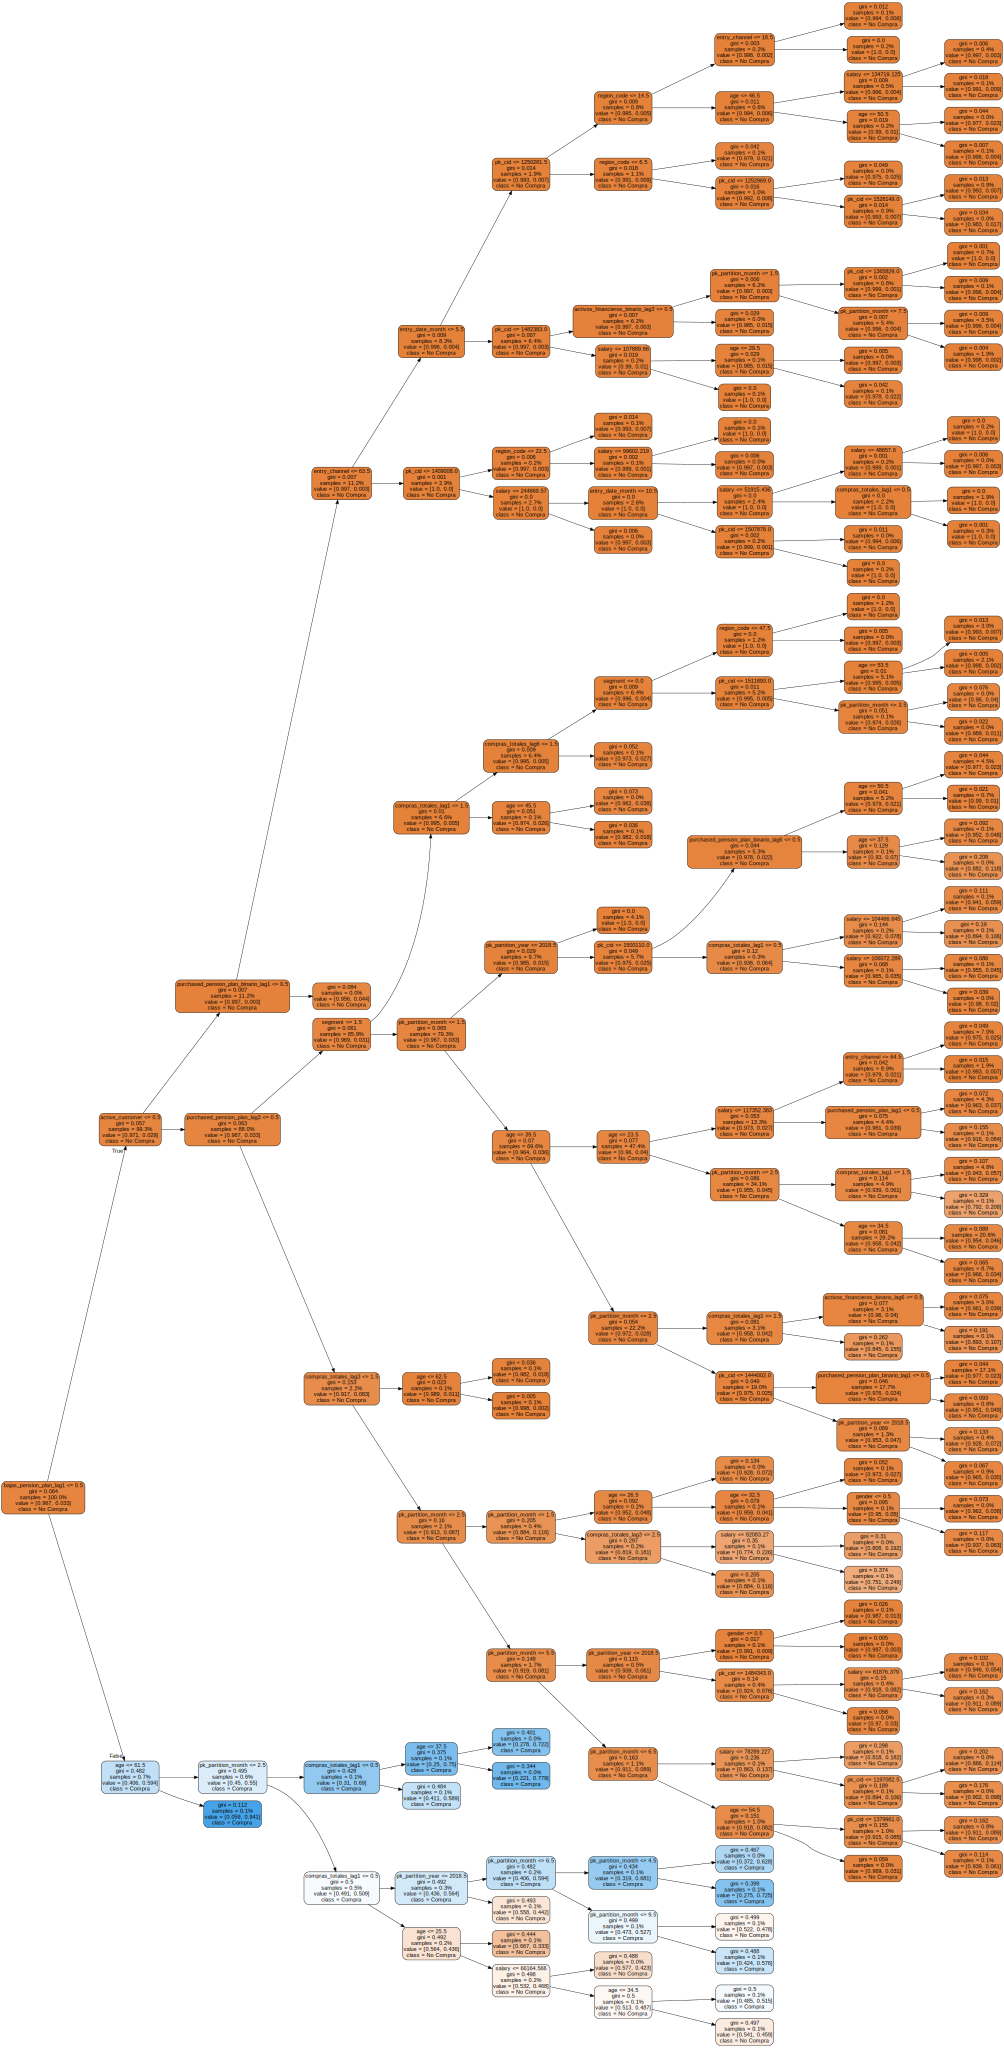

In [ ]:
import graphviz
graphviz.Source(dot_data)

#Feature Importance

In [ ]:
features = X_train.columns.to_list()

In [ ]:
features

['pk_cid',
 'entry_channel',
 'active_customer',
 'segment',
 'country_id',
 'region_code',
 'gender',
 'age',
 'salary',
 'compras_totales_lag1',
 'compras_totales_lag3',
 'compras_totales_lag6',
 'purchased_pension_plan_binario_lag1',
 'purchased_pension_plan_binario_lag3',
 'purchased_pension_plan_binario_lag6',
 'bajas_pension_plan_lag1',
 'bajas_pension_plan_lag3',
 'bajas_pension_plan_lag6',
 'activos_financieros_binario_lag1',
 'activos_financieros_binario_lag3',
 'activos_financieros_binario_lag6',
 'purchased_pension_plan_lag1',
 'purchased_pension_plan_lag3',
 'purchased_pension_plan_lag6',
 'pk_partition_year',
 'pk_partition_month',
 'entry_date_year',
 'entry_date_month']

In [ ]:
pd.Series(primer_modelo_DT.feature_importances_, index=features ).sort_values(ascending=False).head(30)

bajas_pension_plan_lag1                0.770563
age                                    0.062555
pk_partition_month                     0.048827
active_customer                        0.028367
compras_totales_lag1                   0.021409
purchased_pension_plan_lag3            0.019415
segment                                0.016688
pk_partition_year                      0.011154
salary                                 0.005223
pk_cid                                 0.005041
compras_totales_lag3                   0.004183
entry_channel                          0.001703
purchased_pension_plan_binario_lag1    0.001526
purchased_pension_plan_binario_lag6    0.001124
purchased_pension_plan_lag1            0.001080
activos_financieros_binario_lag6       0.000838
compras_totales_lag6                   0.000099
entry_date_month                       0.000065
region_code                            0.000059
gender                                 0.000058
activos_financieros_binario_lag3       0

In [ ]:
#Evaluacion

y_test_pred = pd.DataFrame(primer_modelo_DT.predict(X_test), index = y_test.index, columns = ['Purchase_Prediction'])

In [ ]:
results_df = y_test.join(y_test_pred, how = 'inner')

In [ ]:
results_df.head(10)

,purchased_pension_plan_binario,Purchase_Prediction
4377009,0,0
5383986,0,0
3658909,0,0
463174,0,0
583318,0,0
1560647,0,0
2305910,0,0
4392374,0,0
3746651,0,0
2355175,0,0


In [ ]:
results_df['Sucess']=(results_df['purchased_pension_plan_binario']==results_df['Purchase_Prediction']).astype(int)

In [ ]:
results_df.head(10)

,purchased_pension_plan_binario,Purchase_Prediction,Sucess
4377009,0,0,1
5383986,0,0,1
3658909,0,0,1
463174,0,0,1
583318,0,0,1
1560647,0,0,1
2305910,0,0,1
4392374,0,0,1
3746651,0,0,1
2355175,0,0,1


In [ ]:
results_df['Sucess'].mean()


0.9681651155602871

In [ ]:
primer_modelo_DT.score(X_test,y_test)

0.9681651155602871

### Metodos de Evaluacion

#### CONFUSSION MATRIX

In [ ]:
#CONFUSSION MATRIX
confusion_matrix=pd.crosstab(results_df['purchased_pension_plan_binario'],results_df['Purchase_Prediction'])

In [ ]:
confusion_matrix


Purchase_Prediction,0,1
purchased_pension_plan_binario,,
0,196724,264
1,6225,620


In [ ]:
#Almacenamos en variables en prevision del feature engineering
TP = confusion_matrix.iloc[1,1]
TN = confusion_matrix.iloc[0,0]
FP = confusion_matrix.iloc[0,1]
FN = confusion_matrix.iloc[1,0]

In [ ]:
print(f"TP = {TP}")
print(f"TN = {TN}")
print(f"FP = {FP}")
print(f"FN = {FN}")

TP = 620
TN = 196724
FP = 264
FN = 6225


In [ ]:
round(TP/X_test.shape[0]*100,2)

0.3

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.9681651155602871

#### Prediccion en forma probabilistica

In [ ]:
#Prediccion en forma probabilistica

#En resumen, este código crea un DataFrame y_score que contiene las probabilidades predichas por el modelo modelo_final de que cada observación en X_test pertenezca a la clase 1.
#Estas probabilidades se almacenan en una columna llamada "Purchase_Score".
y_score=pd.DataFrame(primer_modelo_DT.predict_proba(X_test)[:,1],index=y_test.index,columns=['Purchase_Score'])



In [ ]:
results_df=results_df.join(y_score)


In [ ]:
results_df


,purchased_pension_plan_binario,Purchase_Prediction,Sucess,Purchase_Score
4377009,0,0,1,0.039069
5383986,0,0,1,0.022735
3658909,0,0,1,0.000000
463174,0,0,1,0.004298
583318,0,0,1,0.033607
...,...,...,...,...
3235672,0,0,1,0.046169
3948377,0,0,1,0.022680
4033631,0,0,1,0.022680
1173589,0,0,1,0.004298


In [ ]:
 #Probaremos con un threshold de 0.3 para ver la variacion de los valores
results_df['Purchase_Prediction03']= (results_df['Purchase_Score'] >= 0.3).astype(int)

In [ ]:
results_df['Success03'] = (results_df[TARGET_GENERAL] == results_df['Purchase_Prediction03']).astype(int)

In [ ]:
results_df['Success03'].mean()

0.9680719019982044

#### F1 SCORE

In [ ]:
#F1 SCORE
metrics.f1_score(y_test,y_test_pred)


0.1604347263552853

In [ ]:
precision = precision_score(y_test, y_test_pred)

In [ ]:
precision

0.7013574660633484

In [ ]:
recall = recall_score(y_test, y_test_pred)

In [ ]:
recall

0.09057706355003653

#### ROC CURVE

In [ ]:
## ROC CURVE
fpr,tpr,th=metrics.roc_curve(results_df['purchased_pension_plan_binario'],results_df['Purchase_Score'])
#SUPER IMPORTANTE METER LA PROBABILIDAD ! !
#!! Si veo un triangulo le he pasado la prediccion y tengo q pasar la probabilaid


Text(0, 0.5, 'TPR')

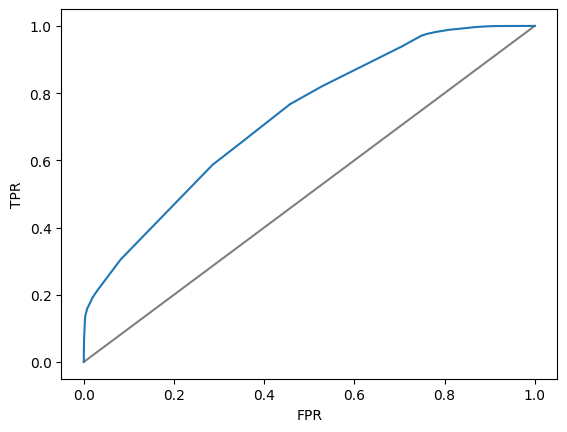

In [ ]:
plt.plot([0,1],[0,1],color='grey')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [ ]:
metrics.roc_auc_score(results_df['purchased_pension_plan_binario'],results_df['Purchase_Score'])

0.7287501073693565

In [ ]:
results_df

,purchased_pension_plan_binario,Purchase_Prediction,Sucess,Purchase_Score,Purchase_Prediction03,Success03
4377009,0,0,1,0.039069,0,1
5383986,0,0,1,0.022735,0,1
3658909,0,0,1,0.000000,0,1
463174,0,0,1,0.004298,0,1
583318,0,0,1,0.033607,0,1
...,...,...,...,...,...,...
3235672,0,0,1,0.046169,0,1
3948377,0,0,1,0.022680,0,1
4033631,0,0,1,0.022680,0,1
1173589,0,0,1,0.004298,0,1


In [ ]:
results_df.head()

,purchased_pension_plan_binario,Purchase_Prediction,Sucess,Purchase_Score,Purchase_Prediction03,Success03
4377009,0,0,1,0.039069,0,1
5383986,0,0,1,0.022735,0,1
3658909,0,0,1,0.000000,0,1
463174,0,0,1,0.004298,0,1
583318,0,0,1,0.033607,0,1


### Modelos Alternativos

#### RandomForest

In [ ]:
segundo_modelo_RF=RandomForestClassifier(n_estimators=100,max_depth=9,min_samples_leaf=100)

In [ ]:
segundo_modelo_RF.fit(X_train, y_train)

<ipython-input-219-68f1f4ed41e6>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  segundo_modelo_RF.fit(X_train, y_train)


RandomForestClassifier(max_depth=9, min_samples_leaf=100)

In [ ]:
#Aplicando Random Forest.
segundo_modelo_RF.score(val_df_X, val_df_y)

0.967342717200057

#### XGBoost

In [ ]:
#Calculamos parametro para balanceo para XGBoost

# Seleccionando la serie dentro del DataFrame y luego aplicando la suma
num_clase_0 = sum(y_test['purchased_pension_plan_binario'] == 0)
num_clase_1 = sum(y_test['purchased_pension_plan_binario'] == 1)

In [ ]:
scale_pos_weight_value = num_clase_0 / num_clase_1

In [ ]:
scale_pos_weight_value

28.778378378378378

In [ ]:
tercer_modelo_XGB = xgb.XGBClassifier(n_estimators = 100,scale_pos_weight=scale_pos_weight_value,max_depth = 9, random_state = 42)

In [ ]:
tercer_modelo_XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = tercer_modelo_XGB.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy

0.7489268175418112

In [ ]:
tercer_modelo_XGB.score(val_df_X, val_df_y)

0.8310309572495126

### Rebalanceo

In [ ]:
df_dev_zero = dev_df[dev_df[TARGET_GENERAL] == 0]
df_dev_nonzero = dev_df[dev_df[TARGET_GENERAL] > 0]


In [ ]:
df_dev_zero.info(verbose = False)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 985123 entries, 4005945 to 5071776
Columns: 29 entries, pk_cid to entry_date_month
dtypes: float64(16), int64(13)
memory usage: 225.5 MB


In [ ]:
df_dev_nonzero.info(verbose = False)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 34038 entries, 2960106 to 5068690
Columns: 29 entries, pk_cid to entry_date_month
dtypes: float64(16), int64(13)
memory usage: 7.8 MB


In [ ]:
n_zero = len(df_dev_nonzero)*2

In [ ]:
n_zero

68076

In [ ]:
n_zero + 34038

102114

In [ ]:
df_dev_zero_sample = df_dev_zero.sample(n = n_zero, random_state = 42 )


In [ ]:
df_dev_zero_sample.shape


(68076, 29)

In [ ]:
df_dev_nonzero.shape


(34038, 29)

In [ ]:
len(df_dev_nonzero) / len(df_dev_zero_sample)

0.5

In [ ]:
df_dev_sample = pd.concat([df_dev_zero_sample,df_dev_nonzero])


In [ ]:
df_dev_sample_X = df_dev_sample.drop(TARGET_GENERAL, axis = 1)
df_dev_sample_y = df_dev_sample[[TARGET_GENERAL]]


In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    df_dev_sample_X,
    df_dev_sample_y,
    random_state = 42,
    test_size = .3
)

In [ ]:
X_train.shape


(71479, 28)

In [ ]:
X_test.shape

(30635, 28)

In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
pk_cid,71479.0,1.246407e+06,178875.377765,17457.00,1132616.000,1257559.00,1380044.00,1547343.00
entry_channel,71479.0,4.920209e+01,14.796577,0.00,45.000,57.00,59.00,68.00
active_customer,71479.0,9.200185e-01,0.271267,0.00,1.000,1.00,1.00,1.00
segment,71479.0,2.277452e+00,0.643707,-1.00,2.000,2.00,3.00,3.00
country_id,71479.0,9.995663e-01,0.020821,0.00,1.000,1.00,1.00,1.00
region_code,71479.0,2.632233e+01,13.013341,0.00,15.000,28.00,35.00,52.00
gender,71479.0,4.528043e-01,0.497771,0.00,0.000,0.00,1.00,1.00
age,71479.0,3.596627e+01,12.995312,16.00,26.000,33.00,42.00,102.00
salary,71479.0,1.106049e+05,137157.347887,5163.75,65838.615,89194.62,125849.07,15711716.46
compras_totales_lag1,71479.0,2.222891e-01,0.564597,0.00,0.000,0.00,0.00,5.00


In [ ]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
pk_cid,30635.0,1.246613e+06,177059.923213,17457.00,1133370.50,1257614.00,1378761.50,1547739.00
entry_channel,30635.0,4.924652e+01,14.704691,0.00,45.00,57.00,59.00,68.00
active_customer,30635.0,9.179370e-01,0.274465,0.00,1.00,1.00,1.00,1.00
segment,30635.0,2.283173e+00,0.643580,-1.00,2.00,2.00,3.00,3.00
country_id,30635.0,9.993145e-01,0.026173,0.00,1.00,1.00,1.00,1.00
region_code,30635.0,2.627834e+01,12.998337,0.00,15.00,28.00,35.00,52.00
gender,30635.0,4.490289e-01,0.497403,0.00,0.00,0.00,1.00,1.00
age,30635.0,3.596360e+01,13.054916,18.00,26.00,33.00,42.00,101.00
salary,30635.0,1.109840e+05,144919.287857,5163.75,65812.32,89071.44,125849.07,9833872.77
compras_totales_lag1,30635.0,2.178228e-01,0.558793,0.00,0.00,0.00,0.00,5.00


In [ ]:
for i in range(1,20):
    model_overfit = DecisionTreeClassifier(max_depth = i, min_samples_leaf= 100)
    model_overfit.fit(X_train, y_train)
    acc_train = round(model_overfit.score(X_train, y_train),3) #accuracy en train
    acc_test = round(model_overfit.score(X_test, y_test),3) #accuracy en test
    print(f'Profundidad del arbol {i}: Train {acc_train} , Test {acc_test}, Overfit {round(acc_train - acc_test,3)}')

Profundidad del arbol 1: Train 0.706 , Test 0.711, Overfit -0.005
Profundidad del arbol 2: Train 0.706 , Test 0.711, Overfit -0.005
Profundidad del arbol 3: Train 0.706 , Test 0.711, Overfit -0.005
Profundidad del arbol 4: Train 0.706 , Test 0.711, Overfit -0.005
Profundidad del arbol 5: Train 0.712 , Test 0.714, Overfit -0.002
Profundidad del arbol 6: Train 0.712 , Test 0.714, Overfit -0.002
Profundidad del arbol 7: Train 0.713 , Test 0.714, Overfit -0.001
Profundidad del arbol 8: Train 0.713 , Test 0.714, Overfit -0.001
Profundidad del arbol 9: Train 0.714 , Test 0.716, Overfit -0.002
Profundidad del arbol 10: Train 0.717 , Test 0.718, Overfit -0.001
Profundidad del arbol 11: Train 0.719 , Test 0.719, Overfit 0.0
Profundidad del arbol 12: Train 0.72 , Test 0.719, Overfit 0.001
Profundidad del arbol 13: Train 0.722 , Test 0.718, Overfit 0.004
Profundidad del arbol 14: Train 0.723 , Test 0.717, Overfit 0.006
Profundidad del arbol 15: Train 0.723 , Test 0.718, Overfit 0.005
Profundidad 

In [ ]:
#Modelling

primer_modelo_RE_DT=DecisionTreeClassifier( max_depth=9, min_samples_leaf=350, random_state=42 )



In [ ]:
primer_modelo_RE_DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=350, random_state=42)

In [ ]:
#funcion directa
primer_modelo_RE_DT.score(val_df_X, val_df_y)

0.9410219221075657

In [ ]:
#Evaluacion

y_test_pred = pd.DataFrame(primer_modelo_RE_DT.predict(X_test), index = y_test.index, columns = ['Purchase_Prediction'])

In [ ]:
results_df_2 = y_test.join(y_test_pred, how = 'inner')

In [ ]:
results_df_2.head(10)

,purchased_pension_plan_binario,Purchase_Prediction
4494797,0,0
5130398,0,0
546747,1,0
5282697,1,0
1183862,0,0
3300826,1,1
1283712,1,0
4247247,1,1
4639795,1,1
434057,0,0


In [ ]:
results_df_2['Sucess']=(results_df_2['purchased_pension_plan_binario']==results_df_2['Purchase_Prediction']).astype(int)

In [ ]:
results_df_2.head(10)

,purchased_pension_plan_binario,Purchase_Prediction,Sucess
4494797,0,0,1
5130398,0,0,1
546747,1,0,0
5282697,1,0,0
1183862,0,0,1
3300826,1,1,1
1283712,1,0,0
4247247,1,1,1
4639795,1,1,1
434057,0,0,1


In [ ]:
results_df_2['Sucess'].mean()


0.7151297535498613

In [ ]:
primer_modelo_RE_DT.score(X_test,y_test)

0.7151297535498613

### Metodos de Evaluacion

#### CONFUSSION MATRIX

In [ ]:
#CONFUSSION MATRIX
confusion_matrix=pd.crosstab(results_df_2['purchased_pension_plan_binario'],results_df_2['Purchase_Prediction'])

In [ ]:
confusion_matrix


Purchase_Prediction,0,1
purchased_pension_plan_binario,,
0,20093,439
1,8288,1815


In [ ]:
#Almacenamos en variables en prevision del feature engineering
TP = confusion_matrix.iloc[1,1]
TN = confusion_matrix.iloc[0,0]
FP = confusion_matrix.iloc[0,1]
FN = confusion_matrix.iloc[1,0]

In [ ]:
print(f"TP = {TP}")
print(f"TN = {TN}")
print(f"FP = {FP}")
print(f"FN = {FN}")

TP = 1815
TN = 20093
FP = 439
FN = 8288


In [ ]:
round(TP/X_test.shape[0]*100,2)

5.92

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.7151297535498613

#### Prediccion en forma probabilistica

In [ ]:
#Prediccion en forma probabilistica

#En resumen, este código crea un DataFrame y_score que contiene las probabilidades predichas por el modelo modelo_final de que cada observación en X_test pertenezca a la clase 1.
#Estas probabilidades se almacenan en una columna llamada "Purchase_Score".
y_score=pd.DataFrame(primer_modelo_RE_DT.predict_proba(X_test)[:,1],index=y_test.index,columns=['Purchase_Score'])



In [ ]:
results_df_2=results_df_2.join(y_score)


In [ ]:
results_df_2


,purchased_pension_plan_binario,Purchase_Prediction,Sucess,Purchase_Score
4494797,0,0,1,0.267159
5130398,0,0,1,0.403383
546747,1,0,0,0.403383
5282697,1,0,0,0.403383
1183862,0,0,1,0.253412
...,...,...,...,...
4319386,0,0,1,0.489983
1341117,0,0,1,0.322851
4483147,0,0,1,0.489983
4581180,1,0,0,0.322851


#### F1 SCORE

In [ ]:
#F1 SCORE
metrics.f1_score(y_test,y_test_pred)


0.29376062151007526

In [ ]:
precision = precision_score(y_test, y_test_pred)

In [ ]:
precision

0.8052351375332741

In [ ]:
recall = recall_score(y_test, y_test_pred)

In [ ]:
recall

0.17964960902702168

#### ROC CURVE

In [ ]:
## ROC CURVE
fpr,tpr,th=metrics.roc_curve(results_df_2['purchased_pension_plan_binario'],results_df_2['Purchase_Score'])
#SUPER IMPORTANTE METER LA PROBABILIDAD ! !
#!! Si veo un triangulo le he pasado la prediccion y tengo q pasar la probabilaid


Text(0, 0.5, 'TPR')

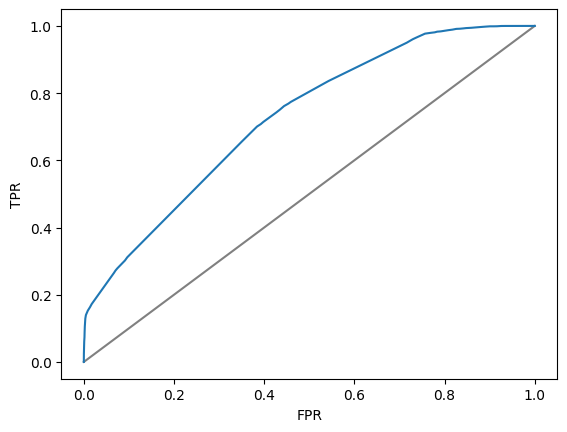

In [ ]:
plt.plot([0,1],[0,1],color='grey')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [ ]:
metrics.roc_auc_score(results_df_2['purchased_pension_plan_binario'],results_df_2['Purchase_Score'])

0.7258929283011901

In [ ]:
results_df_2

,purchased_pension_plan_binario,Purchase_Prediction,Sucess,Purchase_Score
4494797,0,0,1,0.267159
5130398,0,0,1,0.403383
546747,1,0,0,0.403383
5282697,1,0,0,0.403383
1183862,0,0,1,0.253412
...,...,...,...,...
4319386,0,0,1,0.489983
1341117,0,0,1,0.322851
4483147,0,0,1,0.489983
4581180,1,0,0,0.322851


##SEGUNDO MODELO CON REBALANCEO - Modelo Elegido -

In [ ]:
segundo_modelo_RF_RE=RandomForestClassifier(n_estimators=100,max_depth=9,min_samples_leaf=100)

In [ ]:
segundo_modelo_RF_RE.fit(X_train, y_train)

<ipython-input-277-2142c7d1c17a>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  segundo_modelo_RF_RE.fit(X_train, y_train)


RandomForestClassifier(max_depth=9, min_samples_leaf=100)

In [ ]:
#Aplicando Random Forest mejoramos nuestros valores obtenidos en nuestro modelo procesado con Decision Tree.
segundo_modelo_RF_RE.score(val_df_X, val_df_y)

0.9227257596652242

In [ ]:
y_test_pred = pd.DataFrame(segundo_modelo_RF_RE.predict(X_test), index = y_test.index, columns = ['Purchase_Prediction'])

In [ ]:
results_df_3 = y_test.join(y_test_pred, how = 'inner')

In [ ]:
results_df_3.head(10)

,purchased_pension_plan_binario,Purchase_Prediction
4494797,0,0
5130398,0,0
546747,1,0
5282697,1,0
1183862,0,0
3300826,1,1
1283712,1,0
4247247,1,1
4639795,1,1
434057,0,0


In [ ]:
results_df_3['Sucess']=(results_df_3['purchased_pension_plan_binario']==results_df_3['Purchase_Prediction']).astype(int)

In [ ]:
results_df_3.head()

,purchased_pension_plan_binario,Purchase_Prediction,Sucess
4494797,0,0,1
5130398,0,0,1
546747,1,0,0
5282697,1,0,0
1183862,0,0,1


In [ ]:
results_df_3['Sucess'].mean()

0.7184592786029051

In [ ]:
segundo_modelo_RF_RE.score(X_test,y_test)

0.7184592786029051

#### CONFUSSION MATRIX

In [ ]:
#CONFUSSION MATRIX
confusion_matrix=pd.crosstab(results_df_3['purchased_pension_plan_binario'],results_df_3['Purchase_Prediction'])

In [ ]:
confusion_matrix


Purchase_Prediction,0,1
purchased_pension_plan_binario,,
0,19933,599
1,8026,2077


In [ ]:
#Almacenamos en variables en prevision del feature engineering
TP = confusion_matrix.iloc[1,1]
TN = confusion_matrix.iloc[0,0]
FP = confusion_matrix.iloc[0,1]
FN = confusion_matrix.iloc[1,0]

In [ ]:
print(f"TP = {TP}")
print(f"TN = {TN}")
print(f"FP = {FP}")
print(f"FN = {FN}")

TP = 2077
TN = 19933
FP = 599
FN = 8026


In [ ]:
round(TP/X_test.shape[0]*100,2)

6.78

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.7184592786029051

In [ ]:
#Prediccion en forma probabilistica

#En resumen, este código crea un DataFrame y_score que contiene las probabilidades predichas por el modelo modelo_final de que cada observación en X_test pertenezca a la clase 1.
#Estas probabilidades se almacenan en una columna llamada "Purchase_Score".
y_score=pd.DataFrame(segundo_modelo_RF_RE.predict_proba(X_test)[:,1],index=y_test.index,columns=['Purchase_Score'])


In [ ]:
y_score

,Purchase_Score
4494797,0.355263
5130398,0.347663
546747,0.354918
5282697,0.463885
1183862,0.308501
...,...
4319386,0.554035
1341117,0.322604
4483147,0.371769
4581180,0.341278


In [ ]:
results_df_3=results_df_3.join(y_score)


In [ ]:
results_df_3


,purchased_pension_plan_binario,Purchase_Prediction,Sucess,Purchase_Score
4494797,0,0,1,0.355263
5130398,0,0,1,0.347663
546747,1,0,0,0.354918
5282697,1,0,0,0.463885
1183862,0,0,1,0.308501
...,...,...,...,...
4319386,0,1,0,0.554035
1341117,0,0,1,0.322604
4483147,0,0,1,0.371769
4581180,1,0,0,0.341278


#### F1 SCORE

In [ ]:
#F1 SCORE
metrics.f1_score(y_test,y_test_pred)


0.32506455904217857

In [ ]:
precision = precision_score(y_test, y_test_pred)

In [ ]:
precision

0.7761584454409567

In [ ]:
recall = recall_score(y_test, y_test_pred)

In [ ]:
recall

0.20558250024745126

In [ ]:
## ROC CURVE
fpr,tpr,th=metrics.roc_curve(results_df_3['purchased_pension_plan_binario'],results_df_3['Purchase_Score'])



Text(0, 0.5, 'TPR')

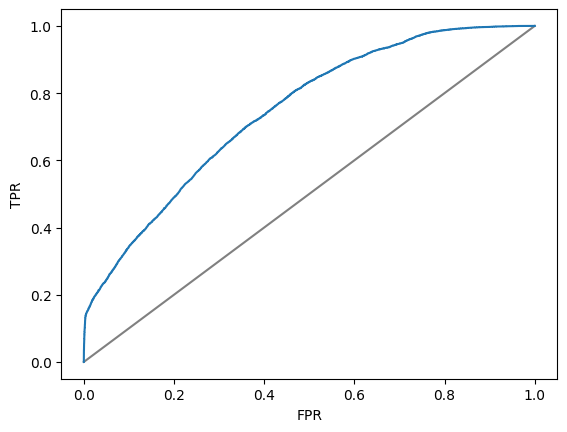

In [ ]:
plt.plot([0,1],[0,1],color='grey')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [ ]:
metrics.roc_auc_score(results_df_3['purchased_pension_plan_binario'],results_df_3['Purchase_Score'])

0.745032316082592

In [ ]:
results_df_3

,purchased_pension_plan_binario,Purchase_Prediction,Sucess,Purchase_Score
4494797,0,0,1,0.355263
5130398,0,0,1,0.347663
546747,1,0,0,0.354918
5282697,1,0,0,0.463885
1183862,0,0,1,0.308501
...,...,...,...,...
4319386,0,1,0,0.554035
1341117,0,0,1,0.322604
4483147,0,0,1,0.371769
4581180,1,0,0,0.341278


In [ ]:
#### XGBoost, aplicamos este modelo, pero en la conclusion final no sera el modelo que mejores resultados obtiene.

In [ ]:
tercer_modelo_XGB_RE = xgb.XGBClassifier(n_estimators = 100, max_depth = 9, random_state = 42)

In [ ]:
tercer_modelo_XGB_RE.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = tercer_modelo_XGB_RE.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy

0.7238779174147217

In [ ]:
tercer_modelo_XGB_RE.score(val_df_X, val_df_y)

0.8794521850777498

#Analisis de la variable objetivo utilizando el Modelo 2 /Random Forest/ REBALANCEADO:

In [ ]:
df_analisis1=df_cust_demo3.copy()

In [ ]:
df_analisis1.set_index('pk_cid',inplace=True)

In [ ]:
df_analisis1 = df_analisis1[(df_analisis1['pk_partition_year'] == 2019) &
                            (df_analisis1['pk_partition_month'] == 5)]

# Seleccionando solamente la columna 'purchased_pension_plan_binario'
df_analisis1 = df_analisis1[['purchased_pension_plan_binario']]
df_analisis1

,purchased_pension_plan_binario
pk_cid,
16203,0
16502,0
17457,0
17970,0
18146,0
...,...
1548196,0
1548197,1
1548201,0


### Conclusion Probabilidad final de compra de producto

In [ ]:
y_test_predJUNIO = pd.DataFrame(segundo_modelo_RF_RE.predict(val_df_X), index = val_df_y.index, columns = ['Purchase_Prediction'])


In [ ]:
y_test_predJUNIO


,Purchase_Prediction
5492849,0
5492848,0
5492851,0
5492840,0
5492841,0
...,...
5651657,0
5651668,0
5651654,0
5651653,0


In [ ]:
y_test_predJUNIO.value_counts()


Purchase_Prediction
0                      79193
1                       4923
dtype: int64

In [ ]:
results_df_3JUNIO = val_df_y.join(y_test_predJUNIO, how = 'inner')


In [ ]:
results_df_3JUNIO.head(10)


,purchased_pension_plan_binario,Purchase_Prediction
5492849,0,0
5492848,0,0
5492851,0,0
5492840,0,0
5492841,0,0
5492844,0,0
5492858,0,0
5492863,0,0
5492852,0,0
5492855,0,0


In [ ]:
results_df_3JUNIO.sum()


purchased_pension_plan_binario    2777
Purchase_Prediction               4923
dtype: int64

In [ ]:
results_df_3JUNIO['Sucess']=(results_df_3JUNIO['purchased_pension_plan_binario']==results_df_3JUNIO['Purchase_Prediction']).astype(int)


In [ ]:
results_df_3JUNIO.head()


,purchased_pension_plan_binario,Purchase_Prediction,Sucess
5492849,0,0,1
5492848,0,0,1
5492851,0,0,1
5492840,0,0,1
5492841,0,0,1


In [ ]:
results_df_3JUNIO['Sucess'].mean()


0.9227257596652242

In [ ]:
segundo_modelo_RF_RE.score(val_df_X,val_df_y)

0.9227257596652242

### Conclusion Prediccion Probabilista de compra del producto (Pension Plan)

In [ ]:
y_scoreJUNIO=pd.DataFrame(segundo_modelo_RF_RE.predict_proba(val_df_X)[:,1],index=val_df_y.index,columns=['Purchase_Score'])


In [ ]:
y_scoreJUNIO


,Purchase_Score
5492849,0.150891
5492848,0.308900
5492851,0.306598
5492840,0.235448
5492841,0.157335
...,...
5651657,0.453938
5651668,0.395172
5651654,0.213136
5651653,0.412770


In [ ]:
results_df_3JUNIO


,purchased_pension_plan_binario,Purchase_Prediction,Sucess
5492849,0,0,1
5492848,0,0,1
5492851,0,0,1
5492840,0,0,1
5492841,0,0,1
...,...,...,...
5651657,0,0,1
5651668,1,0,0
5651654,0,0,1
5651653,0,0,1


In [ ]:
results_df_3JUNIO=results_df_3JUNIO.join(y_scoreJUNIO)


In [ ]:
results_df_3JUNIO


,purchased_pension_plan_binario,Purchase_Prediction,Sucess,Purchase_Score
5492849,0,0,1,0.150891
5492848,0,0,1,0.308900
5492851,0,0,1,0.306598
5492840,0,0,1,0.235448
5492841,0,0,1,0.157335
...,...,...,...,...
5651657,0,0,1,0.453938
5651668,1,0,0,0.395172
5651654,0,0,1,0.213136
5651653,0,0,1,0.412770


In [ ]:
 #Probaremos con un threshold de 0.5 para ver la variacion de los valores
results_df_3JUNIO['Purchase_Prediction05']= (results_df_3JUNIO['Purchase_Score'] >= 0.5).astype(int)


In [ ]:
results_df_3JUNIO['Success05'] = (results_df_3JUNIO[TARGET_GENERAL] == results_df_3JUNIO['Purchase_Prediction05']).astype(int)


In [ ]:
results_df_3JUNIO['Success05'].mean()

0.9227257596652242

### Dataframe de analisis de compradores

In [ ]:
val_df_X_EstimacionCompras = val_df_X.copy()  # Copia el DataFrame original (solo incluido mayo)


In [ ]:
val_df_X_EstimacionCompras.set_index('pk_cid', inplace=True)  # Establece la columna 'pk_cid' como el nuevo índice


In [ ]:
val_df_X_EstimacionCompras


,entry_channel,active_customer,segment,country_id,region_code,gender,age,salary,compras_totales_lag1,compras_totales_lag3,compras_totales_lag6,purchased_pension_plan_binario_lag1,purchased_pension_plan_binario_lag3,purchased_pension_plan_binario_lag6,bajas_pension_plan_lag1,bajas_pension_plan_lag3,bajas_pension_plan_lag6,activos_financieros_binario_lag1,activos_financieros_binario_lag3,activos_financieros_binario_lag6,purchased_pension_plan_lag1,purchased_pension_plan_lag3,purchased_pension_plan_lag6,pk_partition_year,pk_partition_month,entry_date_year,entry_date_month
pk_cid,,,,,,,,,,,,,,,,,,,,,,,,,,,
16203,17,1,1,1,8,0,70,126313.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2018,12
16502,62,1,2,1,28,1,58,135263.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2018,9
17457,17,1,2,1,28,1,54,102405.75,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2019,5,2017,9
17970,17,1,2,1,28,0,76,126718.74,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2019,5,2015,4
18146,44,1,1,1,28,0,65,136820.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548196,61,1,2,1,12,1,32,61087.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2019,4
1548197,61,1,2,1,29,0,40,88525.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2019,4
1548201,61,0,2,1,28,1,36,110966.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2019,4


### Predict

In [ ]:
y_test_pred_EstimacionCompras = pd.DataFrame(segundo_modelo_RF_RE.predict(val_df_X), index = val_df_X_EstimacionCompras.index, columns = ['Purchase_Prediction'])


In [ ]:
y_test_pred_EstimacionCompras.value_counts()


Purchase_Prediction
0                      79193
1                       4923
dtype: int64

### Predict Proba -- Probabilidad de compra

In [ ]:
y_scoreJUNIO=pd.DataFrame(segundo_modelo_RF_RE.predict_proba(val_df_X)[:,1],index = val_df_X_EstimacionCompras.index,columns=['Purchase_Score'])

In [ ]:
y_scoreJUNIO_sorted = y_scoreJUNIO.sort_values(by='Purchase_Score', ascending=False)

In [ ]:
y_scoreJUNIO_sorted_ProbCompra=y_scoreJUNIO_sorted[y_scoreJUNIO_sorted['Purchase_Score']>=0.5]

In [ ]:
y_scoreJUNIO_sorted_ProbCompra

,Purchase_Score
pk_cid,
1005727,0.902400
1003655,0.899845
1133983,0.899491
1236782,0.898980
1119011,0.898571
...,...
281591,0.500060
1497541,0.500055
1098459,0.500050


In [ ]:
y_scoreJUNIO_sorted_ProbCompra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4923 entries, 1005727 to 1181476
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchase_Score  4923 non-null   float64
dtypes: float64(1)
memory usage: 76.9 KB


In [ ]:
y_test_pred_EstimacionCompras.head()

,Purchase_Prediction
pk_cid,
16203,0
16502,0
17457,0
17970,0
18146,0


In [ ]:
ComprasEstimadasJunio=y_test_pred_EstimacionCompras[y_test_pred_EstimacionCompras['Purchase_Prediction']>0]


In [ ]:
ComprasEstimadasJunio

,Purchase_Prediction
pk_cid,
33205,1
35849,1
62064,1
62175,1
74455,1
...,...
1535530,1
1536994,1
1537827,1


In [ ]:
## queremos que el index 'pk_cid' sea una columna
ComprasEstimadasJunio.reset_index(inplace=True)


In [ ]:
## queremos que el index 'pk_cid' sea una columna
y_scoreJUNIO_sorted_ProbCompra.reset_index(inplace=True)

In [ ]:
y_scoreJUNIO_sorted_ProbCompra

,pk_cid,Purchase_Score
0,1005727,0.902400
1,1003655,0.899845
2,1133983,0.899491
3,1236782,0.898980
4,1119011,0.898571
...,...,...
4918,281591,0.500060
4919,1497541,0.500055
4920,1098459,0.500050
4921,1199722,0.500034


In [ ]:
ComprasEstimadasJunio.index.name = 'Index'

In [ ]:
y_scoreJUNIO_sorted_ProbCompra.index.name = 'Index'

In [ ]:
y_scoreJUNIO_sorted_ProbCompra

,pk_cid,Purchase_Score
Index,,
0,1005727,0.902400
1,1003655,0.899845
2,1133983,0.899491
3,1236782,0.898980
4,1119011,0.898571
...,...,...
4918,281591,0.500060
4919,1497541,0.500055
4920,1098459,0.500050


In [ ]:
ComprasEstimadasJunio

,pk_cid,Purchase_Prediction
Index,,
0,33205,1
1,35849,1
2,62064,1
3,62175,1
4,74455,1
...,...,...
4918,1535530,1
4919,1536994,1
4920,1537827,1


In [ ]:
#Filtraremos un dataset con los registros pertenecientes a Mayo
df_cust_demo_MAYO =  df_cust_demo3[( df_cust_demo3['pk_partition_year'] == 2019) & ( df_cust_demo3['pk_partition_month'] == 5)]


In [ ]:
df_cust_demo_MAYO = df_cust_demo_MAYO.drop_duplicates(subset=['pk_cid'])

In [ ]:
df_cust_demo_MAYO

,pk_cid,entry_channel,active_customer,segment,country_id,region_code,gender,age,salary,purchased_pension_plan_binario,compras_totales_lag1,compras_totales_lag3,compras_totales_lag6,purchased_pension_plan_binario_lag1,purchased_pension_plan_binario_lag3,purchased_pension_plan_binario_lag6,bajas_pension_plan_lag1,bajas_pension_plan_lag3,bajas_pension_plan_lag6,activos_financieros_binario_lag1,activos_financieros_binario_lag3,activos_financieros_binario_lag6,purchased_pension_plan_lag1,purchased_pension_plan_lag3,purchased_pension_plan_lag6,pk_partition_year,pk_partition_month,entry_date_year,entry_date_month
5492849,16203,17,1,1,1,8,0,70,126313.98,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2018,12
5492848,16502,62,1,2,1,28,1,58,135263.28,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2018,9
5492851,17457,17,1,2,1,28,1,54,102405.75,0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2019,5,2017,9
5492840,17970,17,1,2,1,28,0,76,126718.74,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2019,5,2015,4
5492841,18146,44,1,1,1,28,0,65,136820.79,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651657,1548196,61,1,2,1,12,1,32,61087.11,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2019,4
5651668,1548197,61,1,2,1,29,0,40,88525.71,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2019,4
5651654,1548201,61,0,2,1,28,1,36,110966.67,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2019,4
5651653,1548202,61,1,2,1,28,0,22,144820.14,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2019,4


In [ ]:
# Combina los DataFrames basados en 'pk_cid'
ComprasEstimadasJunio = ComprasEstimadasJunio.merge(df_cust_demo_MAYO[['pk_cid', 'entry_channel', 'active_customer', 'segment', 'country_id', 'region_code', 'gender', 'age', 'salary', 'entry_date_year', 'entry_date_month']], on='pk_cid', how='left')

In [ ]:
# Combina los DataFrames basados en 'pk_cid' para tener csv final de probabiliad de compra %
y_scoreJUNIO_sorted_ProbCompra = y_scoreJUNIO_sorted_ProbCompra.merge(df_cust_demo_MAYO[['pk_cid', 'entry_channel', 'active_customer', 'segment', 'country_id', 'region_code', 'gender', 'age', 'salary', 'entry_date_year', 'entry_date_month']], on='pk_cid', how='left')

In [ ]:
ComprasEstimadasJunio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4923 entries, 0 to 4922
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pk_cid               4923 non-null   int64  
 1   Purchase_Prediction  4923 non-null   int64  
 2   entry_channel        4923 non-null   int64  
 3   active_customer      4923 non-null   int64  
 4   segment              4923 non-null   int64  
 5   country_id           4923 non-null   int64  
 6   region_code          4923 non-null   int64  
 7   gender               4923 non-null   int64  
 8   age                  4923 non-null   int64  
 9   salary               4923 non-null   float64
 10  entry_date_year      4923 non-null   int64  
 11  entry_date_month     4923 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 500.0 KB


In [ ]:
y_scoreJUNIO_sorted_ProbCompra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4923 entries, 0 to 4922
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pk_cid            4923 non-null   int64  
 1   Purchase_Score    4923 non-null   float64
 2   entry_channel     4923 non-null   int64  
 3   active_customer   4923 non-null   int64  
 4   segment           4923 non-null   int64  
 5   country_id        4923 non-null   int64  
 6   region_code       4923 non-null   int64  
 7   gender            4923 non-null   int64  
 8   age               4923 non-null   int64  
 9   salary            4923 non-null   float64
 10  entry_date_year   4923 non-null   int64  
 11  entry_date_month  4923 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 500.0 KB


In [ ]:
df_cust_demo_MAYO[df_cust_demo_MAYO['pk_cid']==1465864]

,pk_cid,entry_channel,active_customer,segment,country_id,region_code,gender,age,salary,purchased_pension_plan_binario,compras_totales_lag1,compras_totales_lag3,compras_totales_lag6,purchased_pension_plan_binario_lag1,purchased_pension_plan_binario_lag3,purchased_pension_plan_binario_lag6,bajas_pension_plan_lag1,bajas_pension_plan_lag3,bajas_pension_plan_lag6,activos_financieros_binario_lag1,activos_financieros_binario_lag3,activos_financieros_binario_lag6,purchased_pension_plan_lag1,purchased_pension_plan_lag3,purchased_pension_plan_lag6,pk_partition_year,pk_partition_month,entry_date_year,entry_date_month
5700494,1465864,61,1,2,1,3,0,31,64380.3,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,5,2018,9


In [ ]:
ComprasEstimadasJunio.head(30)

,pk_cid,Purchase_Prediction,entry_channel,active_customer,segment,country_id,region_code,gender,age,salary,entry_date_year,entry_date_month
0,33205,1,61,1,2,1,40,1,64,99216.66,2018,10
1,35849,1,17,1,2,1,28,1,46,199770.48,2015,12
2,62064,1,17,1,2,1,28,1,46,171654.87,2017,3
3,62175,1,17,1,2,1,8,1,47,162620.43,2015,6
4,74455,1,17,1,2,1,28,1,48,111238.47,2016,1
5,106944,1,17,1,2,1,46,1,59,95615.67,2015,5
6,120000,1,2,1,2,1,35,0,48,106687.74,2017,6
7,120751,1,17,1,2,1,28,1,66,188533.59,2016,1
8,177044,1,17,1,2,1,28,1,60,143059.50,2017,9
9,192005,1,17,1,2,1,28,1,51,105289.26,2016,2


In [ ]:
y_scoreJUNIO_sorted_ProbCompra.head(20)

,pk_cid,Purchase_Score,entry_channel,active_customer,segment,country_id,region_code,gender,age,salary,entry_date_year,entry_date_month
0,1005727,0.902400,17,1,2,1,21,1,29,120273.69,2015,2
1,1003655,0.899845,45,1,2,1,8,0,38,127371.75,2015,1
2,1133983,0.899491,17,1,2,1,28,1,46,104428.17,2016,5
3,1236782,0.898980,45,1,2,1,28,0,41,112205.88,2017,1
4,1119011,0.898571,17,1,2,1,28,1,30,119381.13,2016,1
5,1020380,0.897241,45,1,3,1,28,0,28,142900.23,2015,6
6,1017418,0.897047,45,1,2,1,24,1,35,105388.59,2015,5
7,1116658,0.896107,17,1,3,1,28,0,29,104991.27,2016,1
8,1247302,0.894827,45,1,2,1,8,1,34,112222.08,2017,3
9,1243940,0.894163,45,1,2,1,7,0,41,89834.61,2017,2


In [ ]:
ComprasEstimadasJunio['Purchase_Prediction'].value_counts()

1    4923
Name: Purchase_Prediction, dtype: int64

### Percentiles Prediccion de Compra Dataset

In [ ]:

percentile_75 = y_scoreJUNIO_sorted_ProbCompra['Purchase_Score'].quantile(0.75)

In [ ]:
percentile_75

0.6030268990406837

In [ ]:
above_percentile_75 = y_scoreJUNIO_sorted_ProbCompra[y_scoreJUNIO_sorted_ProbCompra['Purchase_Score'] > percentile_75]

In [ ]:
above_percentile_75.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231 entries, 0 to 1230
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pk_cid            1231 non-null   int64  
 1   Purchase_Score    1231 non-null   float64
 2   entry_channel     1231 non-null   int64  
 3   active_customer   1231 non-null   int64  
 4   segment           1231 non-null   int64  
 5   country_id        1231 non-null   int64  
 6   region_code       1231 non-null   int64  
 7   gender            1231 non-null   int64  
 8   age               1231 non-null   int64  
 9   salary            1231 non-null   float64
 10  entry_date_year   1231 non-null   int64  
 11  entry_date_month  1231 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 125.0 KB


In [ ]:
above_percentile_75.head(20)

,pk_cid,Purchase_Score,entry_channel,active_customer,segment,country_id,region_code,gender,age,salary,entry_date_year,entry_date_month
0,1005727,0.902400,17,1,2,1,21,1,29,120273.69,2015,2
1,1003655,0.899845,45,1,2,1,8,0,38,127371.75,2015,1
2,1133983,0.899491,17,1,2,1,28,1,46,104428.17,2016,5
3,1236782,0.898980,45,1,2,1,28,0,41,112205.88,2017,1
4,1119011,0.898571,17,1,2,1,28,1,30,119381.13,2016,1
5,1020380,0.897241,45,1,3,1,28,0,28,142900.23,2015,6
6,1017418,0.897047,45,1,2,1,24,1,35,105388.59,2015,5
7,1116658,0.896107,17,1,3,1,28,0,29,104991.27,2016,1
8,1247302,0.894827,45,1,2,1,8,1,34,112222.08,2017,3
9,1243940,0.894163,45,1,2,1,7,0,41,89834.61,2017,2


In [ ]:
y_scoreJUNIO_sorted_ProbCompra['Purchase_Score'].describe()

count    4923.000000
mean        0.586167
std         0.096284
min         0.500020
25%         0.522300
50%         0.562374
75%         0.603027
max         0.902400
Name: Purchase_Score, dtype: float64

In [ ]:

percentile_50 = y_scoreJUNIO_sorted_ProbCompra['Purchase_Score'].quantile(0.50)

In [ ]:
percentile_50

0.5623742906589859

In [ ]:
above_percentile_50 = y_scoreJUNIO_sorted_ProbCompra[y_scoreJUNIO_sorted_ProbCompra['Purchase_Score'] > percentile_50]

In [ ]:
above_percentile_50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2461 entries, 0 to 2460
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pk_cid            2461 non-null   int64  
 1   Purchase_Score    2461 non-null   float64
 2   entry_channel     2461 non-null   int64  
 3   active_customer   2461 non-null   int64  
 4   segment           2461 non-null   int64  
 5   country_id        2461 non-null   int64  
 6   region_code       2461 non-null   int64  
 7   gender            2461 non-null   int64  
 8   age               2461 non-null   int64  
 9   salary            2461 non-null   float64
 10  entry_date_year   2461 non-null   int64  
 11  entry_date_month  2461 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 249.9 KB


In [ ]:
above_percentile_50.head(20)

,pk_cid,Purchase_Score,entry_channel,active_customer,segment,country_id,region_code,gender,age,salary,entry_date_year,entry_date_month
0,1005727,0.902400,17,1,2,1,21,1,29,120273.69,2015,2
1,1003655,0.899845,45,1,2,1,8,0,38,127371.75,2015,1
2,1133983,0.899491,17,1,2,1,28,1,46,104428.17,2016,5
3,1236782,0.898980,45,1,2,1,28,0,41,112205.88,2017,1
4,1119011,0.898571,17,1,2,1,28,1,30,119381.13,2016,1
5,1020380,0.897241,45,1,3,1,28,0,28,142900.23,2015,6
6,1017418,0.897047,45,1,2,1,24,1,35,105388.59,2015,5
7,1116658,0.896107,17,1,3,1,28,0,29,104991.27,2016,1
8,1247302,0.894827,45,1,2,1,8,1,34,112222.08,2017,3
9,1243940,0.894163,45,1,2,1,7,0,41,89834.61,2017,2


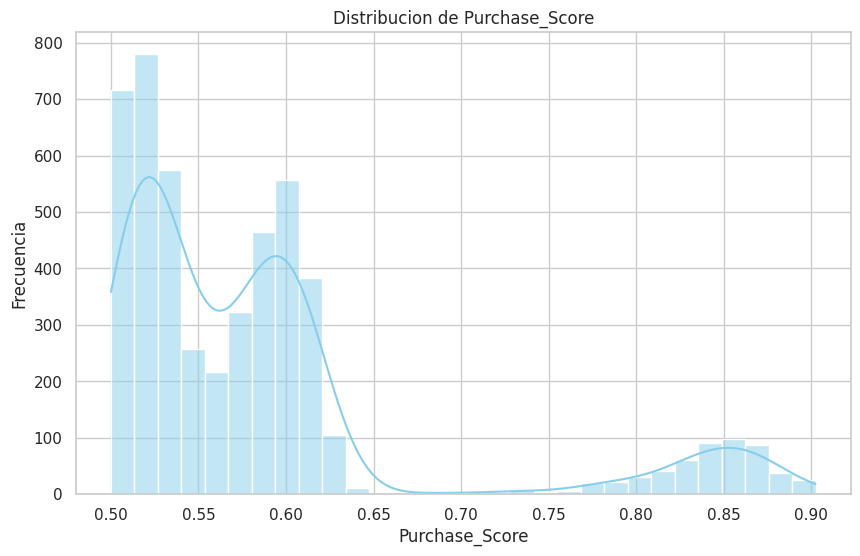

In [ ]:
sns.set_theme(style="whitegrid")
# 1. Distribution of Purchase_Score
plt.figure(figsize=(10, 6))
sns.histplot(y_scoreJUNIO_sorted_ProbCompra['Purchase_Score'], bins=30, kde=True, color='skyblue')
plt.title('Distribucion de Purchase_Score')
plt.xlabel('Purchase_Score')
plt.ylabel('Frecuencia')
plt.show()

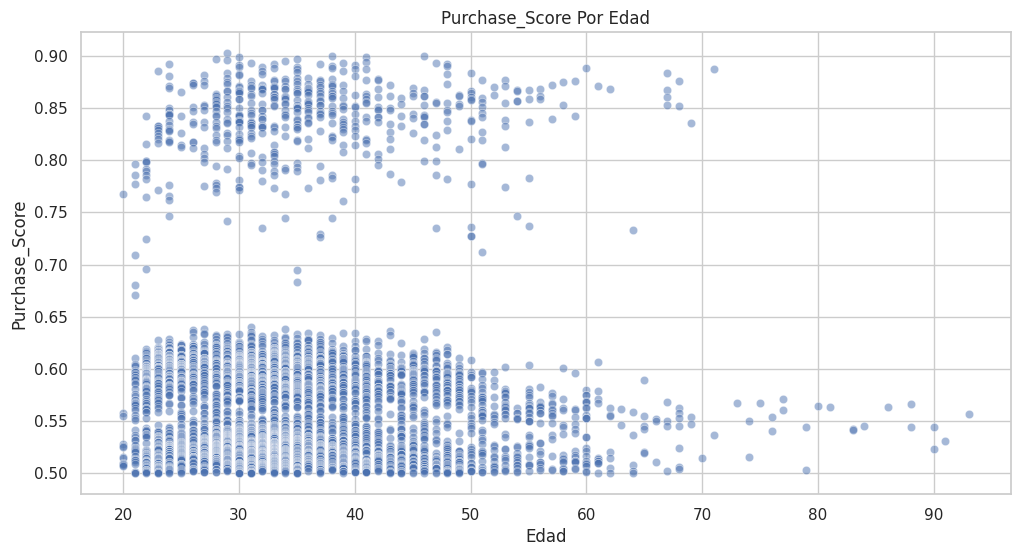

In [ ]:
# 3. Purchase_Score Por Edad
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='Purchase_Score', data=y_scoreJUNIO_sorted_ProbCompra, alpha=0.5)
plt.title('Purchase_Score Por Edad')
plt.xlabel('Edad')
plt.ylabel('Purchase_Score')
plt.show()

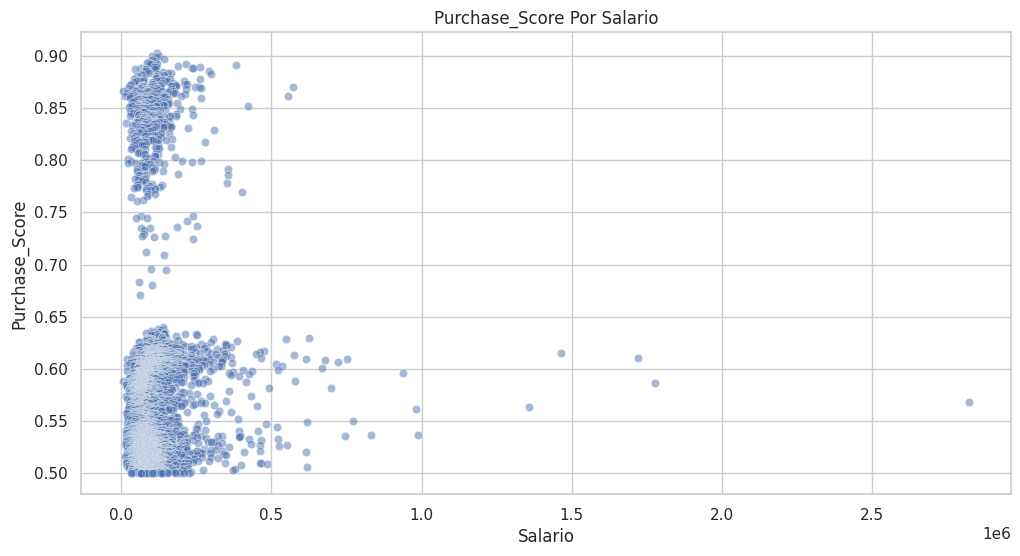

In [ ]:
# 4. Purchase_Score Por Salario
plt.figure(figsize=(12, 6))
sns.scatterplot(x='salary', y='Purchase_Score', data=y_scoreJUNIO_sorted_ProbCompra, alpha=0.5)
plt.title('Purchase_Score Por Salario')
plt.xlabel('Salario')
plt.ylabel('Purchase_Score')
plt.show()

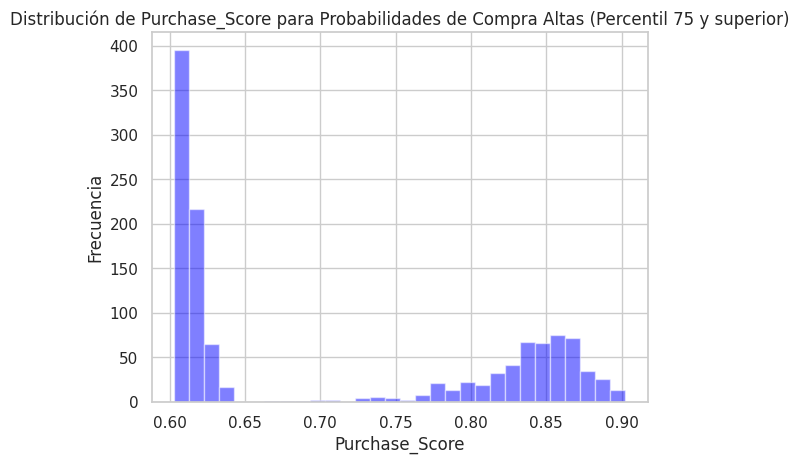

In [ ]:
# Calcula el percentil 75
percentile_75 = y_scoreJUNIO_sorted_ProbCompra['Purchase_Score'].quantile(0.75)
# Filtra los valores por encima del percentil 75
high_probability_purchase = y_scoreJUNIO_sorted_ProbCompra[y_scoreJUNIO_sorted_ProbCompra['Purchase_Score'] > percentile_75]
# Crea un histograma de los valores de 'Purchase_Score' por encima del percentil 75
plt.hist(high_probability_purchase['Purchase_Score'], bins=30, alpha=0.5, color='blue')
plt.xlabel('Purchase_Score')
plt.ylabel('Frecuencia')
plt.title('Distribución de Purchase_Score para Probabilidades de Compra Altas (Percentil 75 y superior)')
# Muestra el gráfico
plt.show()

<ipython-input-379-2495b2a14d34>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=y_scoreJUNIO_sorted_ProbCompra['Purchase_Score'], shade=True)


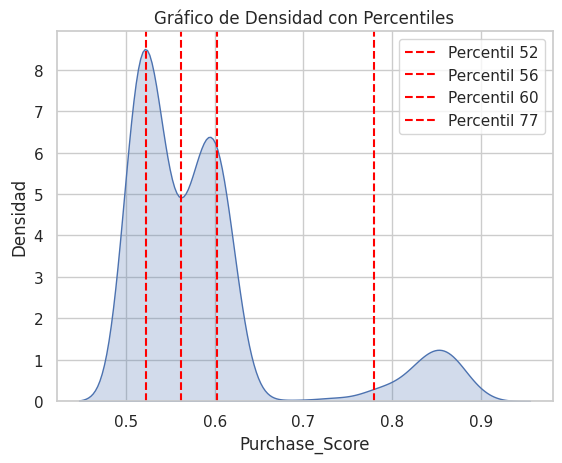

In [ ]:
percentiles_to_plot = [0.25, 0.50, 0.75, 0.90]
percentile_data = y_scoreJUNIO_sorted_ProbCompra['Purchase_Score'].quantile(percentiles_to_plot)
sns.kdeplot(data=y_scoreJUNIO_sorted_ProbCompra['Purchase_Score'], shade=True)
for percentile in percentile_data:
    plt.axvline(x=percentile, color='red', linestyle='--', label=f'Percentil {int(percentile * 100)}')
plt.xlabel('Purchase_Score')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad con Percentiles')
plt.legend()
plt.show()

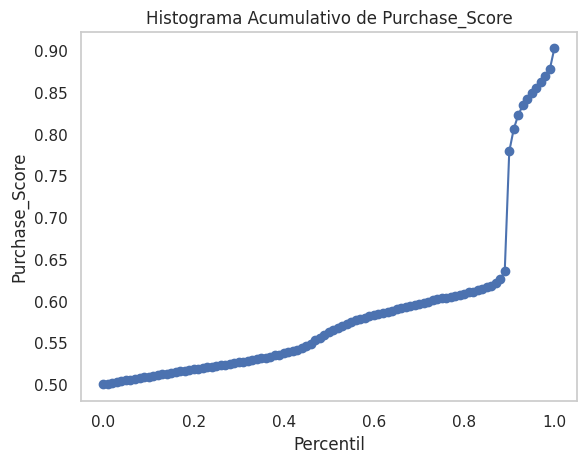

In [ ]:
percentiles_to_plot = np.arange(0, 1.01, 0.01)
percentile_values = y_scoreJUNIO_sorted_ProbCompra['Purchase_Score'].quantile(percentiles_to_plot)
plt.plot(percentiles_to_plot, percentile_values, marker='o')
plt.xlabel('Percentil')
plt.ylabel('Purchase_Score')
plt.title('Histograma Acumulativo de Purchase_Score')
plt.grid()
plt.show()

### Analisis percentiles

In [ ]:
#Vemos que en el percentil 50 englobaria a mas clientes y con los graficos se nota la tendencia en la probabilidad de compra.

In [ ]:
above_percentile_50.to_csv('/content/drive/MyDrive/TFM/PowerBI/csv/Pension_Plan/Percentil_50_V4.csv', index=False)

In [ ]:
# Exportamos .csv para analizar el PowerBI y mostrar conclusiones finales respecto a % Probabilidades de compra ordenados
y_scoreJUNIO_sorted_ProbCompra.to_csv('/content/drive/MyDrive/TFM/PowerBI/csv/Pension_Plan/ProbabilidadCompra_PensionPlan_V4.csv', index=False)

In [ ]:
# Exportamos .csv para analizar el PowerBI y mostrar conclusiones finales.
ComprasEstimadasJunio.to_csv('/content/drive/MyDrive/TFM/PowerBI/csv/Pension_Plan/ComprasEstimadasJunioAnalisis_V4.csv', index=False)

###PICKLE FINAL Y EXPORTACION DEL ARCHIVO

In [ ]:
df_cust_demo3.to_pickle("/content/drive/MyDrive/TFM/pickle's/Pension_Plan/pickle3.pkl")